### AssoExCollective for BMF

In [6]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import AssoExCollective
import pandas as pd
from utils import show_matrix

from cProfile import Profile
from pstats import SortKey, Stats

SyntaxError: invalid syntax (evaluate_utils.py, line 198)

[I] m            : 1000
[I] n            : 500
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 1234
[I] noise        : [0.5 0.2]
[I] seed         : 1024
[I] Using RandomState.


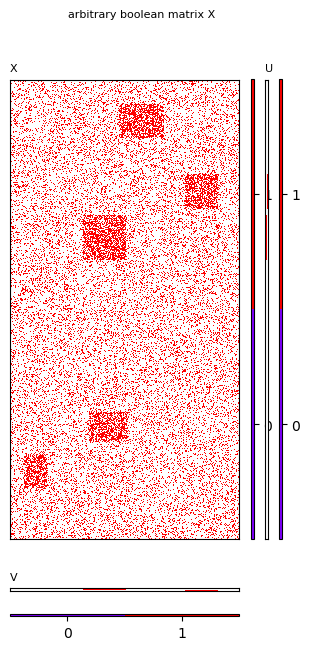

In [2]:
# generate arbitrary Boolean matrix (X)
from generators import BlockDiagonalMatrixGenerator, BlockMatrixGenerator

n_row=1000
n_col=500
k=5
overlap_flag=True
noise=[0.5, 0.2]
size_range=[0.25, 0.75, 0.25, 1.0]

data = BlockMatrixGenerator(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
data.generate(seed=1234) # if no seed assigned, use time instead
data.add_noise(noise=noise, seed=1024)
data.to_sparse()
data.show_matrix(scaling=0.2, title='arbitrary boolean matrix X')

In [3]:
X = data.X

### Load MovieLens data

[I] Sampling axis 0 to size 500
[I]   sampling seed    : 2024
[I]   sampling from    : (943, 1682)
[I]              to    : (500, 1682)
[I] Sampling axis 0 with given indices
[I]   sampling from    : (943, 81)
[I]              to    : (500, 81)
[I] Sampling axis 1 to size 300
[I]   sampling seed    : 2024
[I]   sampling from    : (500, 1682)
[I]              to    : (500, 300)
[I] Sampling axis 1 with given indices
[I]   sampling from    : (26, 1682)
[I]              to    : (26, 300)
[I] Sampling axis 1 with given indices
[I]   sampling from    : (4708, 1682)
[I]              to    : (4708, 300)


[<500x300 sparse matrix of type '<class 'numpy.int32'>'
 	with 8924 stored elements in Compressed Sparse Row format>,
 <500x81 sparse matrix of type '<class 'numpy.float64'>'
 	with 1849 stored elements in Compressed Sparse Row format>,
 <26x300 sparse matrix of type '<class 'numpy.float64'>'
 	with 725 stored elements in Compressed Sparse Row format>,
 <4708x300 sparse matrix of type '<class 'numpy.float64'>'
 	with 1481 stored elements in Compressed Sparse Row format>]

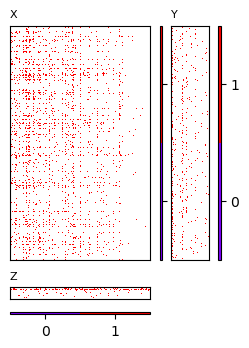

In [4]:
from datasets import MovieLensData, MovieLensGenreCastUserData

data = MovieLensGenreCastUserData(size='100k')

data.load()

data.sample(factor_id=0, n_samples=500, seed=2024)
data.sample(factor_id=1, n_samples=300, seed=2024)

display(data.Xs)

X, Y, Z, _ = data.Xs

show_matrix([(X, [0, 0], 'X'), (Y, [0, 1], 'Y'), (Z, [1, 0], 'Z')], 
            colorbar=True, keep_nan=True, discrete=True, center=True, clim=[0, 1], scaling=0.5)

In [5]:
from datasets import NoSplit, RatioSplit

split = RatioSplit(X=X, val_size=0.1, test_size=0.2, seed=2024)
split.negative_sample(train_size=split.pos_train_size, 
                      val_size=split.pos_val_size, 
                      test_size=split.pos_test_size, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] RatioSplit, sampling positives
[I]   seed         : 2024
[I]   train_size   : 6246
[I]   val_size     : 893
[I]   test_size    : 1785
[I]   seed         : 2024
[I] RatioSplit, sampling negatives
[I]   all_negatives: 141076
[I]   n_negatives  : 8924
[I]   train_size   : 6246
[I]   val_size     : 893
[I]   test_size    : 1785
[I]   seed         : 2024


c:\Users\nieht\miniconda3\envs\py39\lib\site-packages\scipy\sparse\_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


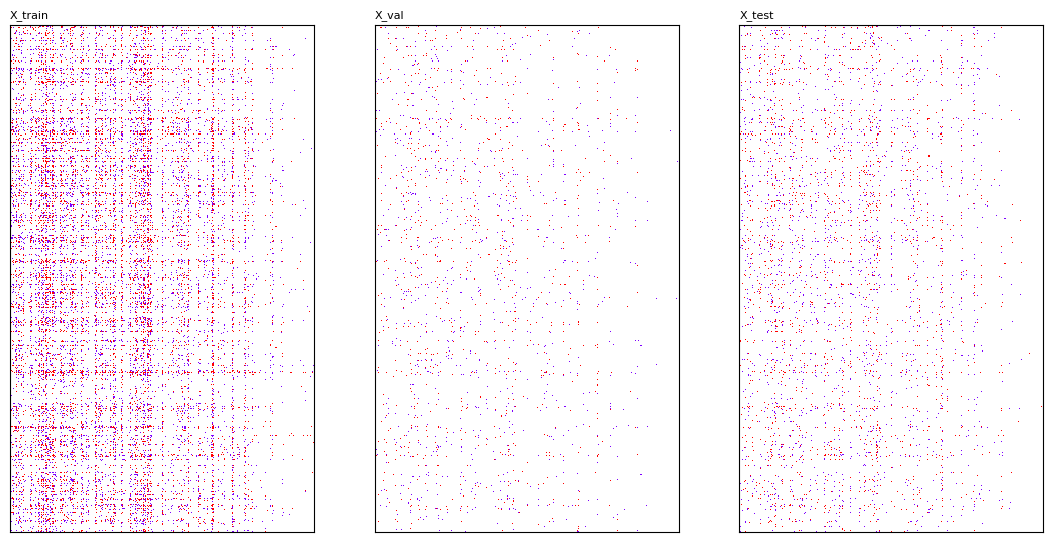

In [6]:
show_matrix(settings=[(X_train, [0, 0], 'X_train'), 
                      (X_val, [0, 1], 'X_val'), 
                      (X_test, [0, 2], 'X_test'), 
                      ], keep_nan=True, clim=[0, 1], discrete=True, center=True)

In [7]:
k = 5
tau = 0.5
w = 0.25

In [1]:
from scipy.sparse import lil_matrix
import pandas as pd
df_dict = {}
def add_log(df_dict, df_name='A'):
    if not df_name in df_dict:
        df_dict[df_name] = pd.DataFrame(columns=[1, 2, 3])
add_log(df_dict)

In [2]:
df_dict

{'A': Empty DataFrame
 Columns: [1, 2, 3]
 Index: []}

### AssoExCollective

[I] k            : 5
[I] verbose      : False
[I] display      : False
[I] tau          : 0.5
[I] weights      : [0.25]
[I] p            : [1]
[W] Missing n_basis, using all basis.
[I] n_basis      : None
[I] task         : prediction
[I] verbose      : True
[I] display      : True
[I] n_basis is updated to: 300


  0%|          | 0/5 [00:00<?, ?it/s]

[I] k: 0, n_iter: 0


[I]     [ f0: 1 ]====[ m: 0 ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:06<00:00, 49.50it/s]
d:\Dropbox\PyBMF\examples\..\utils\collective_evaluate_utils.py:70: RuntimeWarning: divide by zero encountered in divide
  s[0, i] = n / (1 / scores[:, i]).sum(axis=0)


[I]     harmonic: 0.00 ---> 450.00
[I]     weighted: 0.00 ---> 450.00
[I]     best_idx: 63


[I] Making predictions: 100%|██████████| 12492/12492 [00:01<00:00, 11737.80it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
0,29/02/24 12:05:36,0,0,450.000000,0.157861,0.793242,0.558357,0.263320


[I] Making predictions: 100%|██████████| 1786/1786 [00:03<00:00, 506.72it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
0,29/02/24 12:05:37,0,0,0.135498,0.742331,0.544233,0.229167


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:05:41,0,450.000000,0.157861,0.793242,0.558357,0.263320,450.000000,0.157861,0.793242,0.558357,0.263320


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:05:41,0,0.135498,0.742331,0.544233,0.229167,0.135498,0.742331,0.544233,0.229167


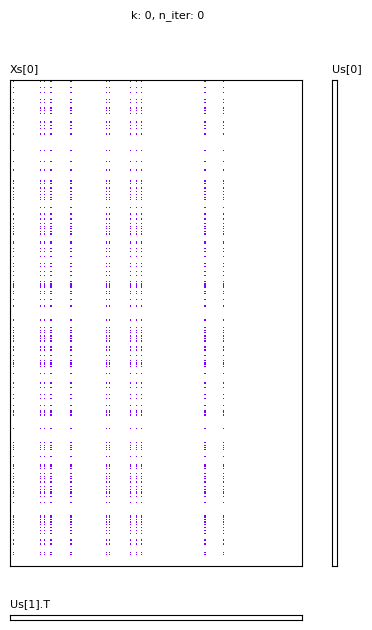

[I] k: 0, n_iter: 1


[I]     [ f0: [0] ]====[ m: [0] ]===>[ f1: 1 ]: 100%|██████████| 300/300 [00:05<00:00, 59.14it/s]
d:\Dropbox\PyBMF\examples\..\utils\collective_evaluate_utils.py:70: RuntimeWarning: divide by zero encountered in divide
  s[0, i] = n / (1 / scores[:, i]).sum(axis=0)


[I]     harmonic: 450.00 ---> 641.75
[I]     weighted: 450.00 ---> 641.75
[I]     best_idx: 119


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 28374.18it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
0,29/02/24 12:05:36,0,0,450.000000,0.157861,0.793242,0.558357,0.263320
1,29/02/24 12:05:46,0,1,641.750000,0.275216,0.730557,0.586856,0.399814


[I] Making predictions: 100%|██████████| 1786/1786 [00:02<00:00, 844.27it/s] 


,time,k,iter,Recall,Precision,Accuracy,F1
0,29/02/24 12:05:37,0,0,0.135498,0.742331,0.544233,0.229167
1,29/02/24 12:05:47,0,1,0.235162,0.681818,0.562710,0.349709


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:05:41,0,450.000000,0.157861,0.793242,0.558357,0.263320,450.000000,0.157861,0.793242,0.558357,0.263320
1,29/02/24 12:05:49,0,641.750000,0.275216,0.730557,0.586856,0.399814,641.750000,0.275216,0.730557,0.586856,0.399814


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:05:41,0,0.135498,0.742331,0.544233,0.229167,0.135498,0.742331,0.544233,0.229167
1,29/02/24 12:05:49,0,0.235162,0.681818,0.562710,0.349709,0.235162,0.681818,0.562710,0.349709


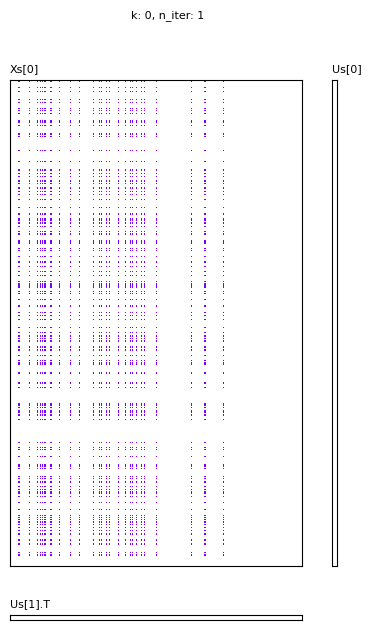

[I]     [ f0: [1] ]====[ m: [0] ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:03<00:00, 87.74it/s] 
d:\Dropbox\PyBMF\examples\..\utils\collective_evaluate_utils.py:70: RuntimeWarning: divide by zero encountered in divide
  s[0, i] = n / (1 / scores[:, i]).sum(axis=0)


[I]     harmonic: 641.75 ---> 680.75
[I]     weighted: 641.75 ---> 680.75
[I]     best_idx: 179


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 21333.03it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
0,29/02/24 12:05:36,0,0,450.000000,0.157861,0.793242,0.558357,0.263320
1,29/02/24 12:05:46,0,1,641.750000,0.275216,0.730557,0.586856,0.399814
2,29/02/24 12:05:53,0,2,680.750000,0.292507,0.723851,0.590458,0.416648


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 979.29it/s] 


,time,k,iter,Recall,Precision,Accuracy,F1
0,29/02/24 12:05:37,0,0,0.135498,0.742331,0.544233,0.229167
1,29/02/24 12:05:47,0,1,0.235162,0.681818,0.562710,0.349709
2,29/02/24 12:05:53,0,2,0.253080,0.684848,0.568309,0.369583


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:05:41,0,450.000000,0.157861,0.793242,0.558357,0.263320,450.000000,0.157861,0.793242,0.558357,0.263320
1,29/02/24 12:05:49,0,641.750000,0.275216,0.730557,0.586856,0.399814,641.750000,0.275216,0.730557,0.586856,0.399814
2,29/02/24 12:05:55,0,680.750000,0.292507,0.723851,0.590458,0.416648,680.750000,0.292507,0.723851,0.590458,0.416648


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:05:41,0,0.135498,0.742331,0.544233,0.229167,0.135498,0.742331,0.544233,0.229167
1,29/02/24 12:05:49,0,0.235162,0.681818,0.562710,0.349709,0.235162,0.681818,0.562710,0.349709
2,29/02/24 12:05:55,0,0.253080,0.684848,0.568309,0.369583,0.253080,0.684848,0.568309,0.369583


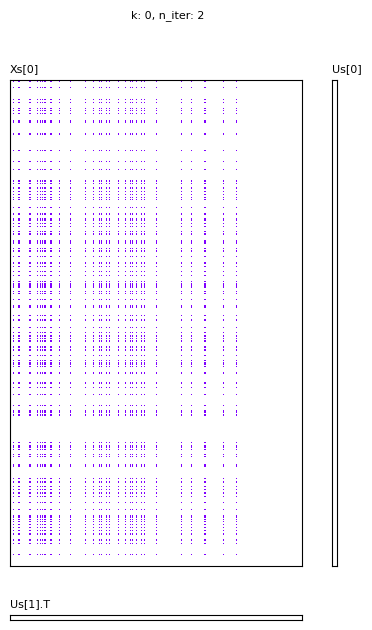

[I] k: 0, n_iter: 3


[I]     [ f0: [0] ]====[ m: [0] ]===>[ f1: 1 ]: 100%|██████████| 300/300 [00:03<00:00, 81.59it/s]
d:\Dropbox\PyBMF\examples\..\utils\collective_evaluate_utils.py:70: RuntimeWarning: divide by zero encountered in divide
  s[0, i] = n / (1 / scores[:, i]).sum(axis=0)


[I]     harmonic: 680.75 ---> 684.00
[I]     weighted: 680.75 ---> 684.00
[I]     best_idx: 27


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 26156.11it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
0,29/02/24 12:05:36,0,0,450.000000,0.157861,0.793242,0.558357,0.263320
1,29/02/24 12:05:46,0,1,641.750000,0.275216,0.730557,0.586856,0.399814
2,29/02/24 12:05:53,0,2,680.750000,0.292507,0.723851,0.590458,0.416648
3,29/02/24 12:05:59,0,3,684.000000,0.286423,0.729608,0.590138,0.411359


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 969.83it/s] 


,time,k,iter,Recall,Precision,Accuracy,F1
0,29/02/24 12:05:37,0,0,0.135498,0.742331,0.544233,0.229167
1,29/02/24 12:05:47,0,1,0.235162,0.681818,0.562710,0.349709
2,29/02/24 12:05:53,0,2,0.253080,0.684848,0.568309,0.369583
3,29/02/24 12:06:00,0,3,0.245241,0.680124,0.564950,0.360494


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:05:41,0,450.000000,0.157861,0.793242,0.558357,0.263320,450.000000,0.157861,0.793242,0.558357,0.263320
1,29/02/24 12:05:49,0,641.750000,0.275216,0.730557,0.586856,0.399814,641.750000,0.275216,0.730557,0.586856,0.399814
2,29/02/24 12:05:55,0,680.750000,0.292507,0.723851,0.590458,0.416648,680.750000,0.292507,0.723851,0.590458,0.416648
3,29/02/24 12:06:02,0,684.000000,0.286423,0.729608,0.590138,0.411359,684.000000,0.286423,0.729608,0.590138,0.411359


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:05:41,0,0.135498,0.742331,0.544233,0.229167,0.135498,0.742331,0.544233,0.229167
1,29/02/24 12:05:49,0,0.235162,0.681818,0.562710,0.349709,0.235162,0.681818,0.562710,0.349709
2,29/02/24 12:05:55,0,0.253080,0.684848,0.568309,0.369583,0.253080,0.684848,0.568309,0.369583
3,29/02/24 12:06:02,0,0.245241,0.680124,0.564950,0.360494,0.245241,0.680124,0.564950,0.360494


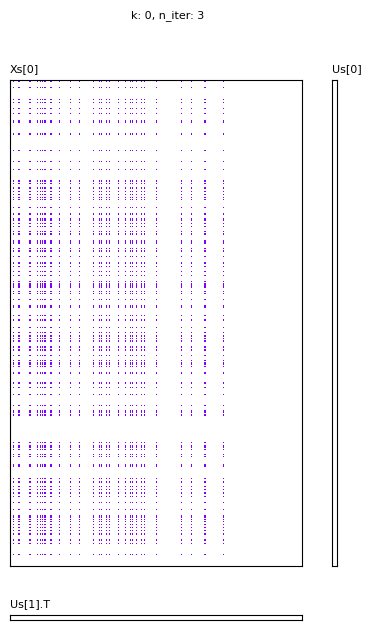

[I]     [ f0: [1] ]====[ m: [0] ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:03<00:00, 87.40it/s] 
d:\Dropbox\PyBMF\examples\..\utils\collective_evaluate_utils.py:70: RuntimeWarning: divide by zero encountered in divide
  s[0, i] = n / (1 / scores[:, i]).sum(axis=0)


[I]     harmonic: 684.00 ---> 684.50
[I]     weighted: 684.00 ---> 684.50
[I]     best_idx: 27


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 42714.24it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
0,29/02/24 12:05:36,0,0,450.000000,0.157861,0.793242,0.558357,0.263320
1,29/02/24 12:05:46,0,1,641.750000,0.275216,0.730557,0.586856,0.399814
2,29/02/24 12:05:53,0,2,680.750000,0.292507,0.723851,0.590458,0.416648
3,29/02/24 12:05:59,0,3,684.000000,0.286423,0.729608,0.590138,0.411359
4,29/02/24 12:06:05,0,4,684.500000,0.287864,0.728230,0.590218,0.412622


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1212.56it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
0,29/02/24 12:05:37,0,0,0.135498,0.742331,0.544233,0.229167
1,29/02/24 12:05:47,0,1,0.235162,0.681818,0.562710,0.349709
2,29/02/24 12:05:53,0,2,0.253080,0.684848,0.568309,0.369583
3,29/02/24 12:06:00,0,3,0.245241,0.680124,0.564950,0.360494
4,29/02/24 12:06:06,0,4,0.246361,0.676923,0.564390,0.361248


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:05:41,0,450.000000,0.157861,0.793242,0.558357,0.263320,450.000000,0.157861,0.793242,0.558357,0.263320
1,29/02/24 12:05:49,0,641.750000,0.275216,0.730557,0.586856,0.399814,641.750000,0.275216,0.730557,0.586856,0.399814
2,29/02/24 12:05:55,0,680.750000,0.292507,0.723851,0.590458,0.416648,680.750000,0.292507,0.723851,0.590458,0.416648
3,29/02/24 12:06:02,0,684.000000,0.286423,0.729608,0.590138,0.411359,684.000000,0.286423,0.729608,0.590138,0.411359
4,29/02/24 12:06:07,0,684.500000,0.287864,0.728230,0.590218,0.412622,684.500000,0.287864,0.728230,0.590218,0.412622


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:05:41,0,0.135498,0.742331,0.544233,0.229167,0.135498,0.742331,0.544233,0.229167
1,29/02/24 12:05:49,0,0.235162,0.681818,0.562710,0.349709,0.235162,0.681818,0.562710,0.349709
2,29/02/24 12:05:55,0,0.253080,0.684848,0.568309,0.369583,0.253080,0.684848,0.568309,0.369583
3,29/02/24 12:06:02,0,0.245241,0.680124,0.564950,0.360494,0.245241,0.680124,0.564950,0.360494
4,29/02/24 12:06:07,0,0.246361,0.676923,0.564390,0.361248,0.246361,0.676923,0.564390,0.361248


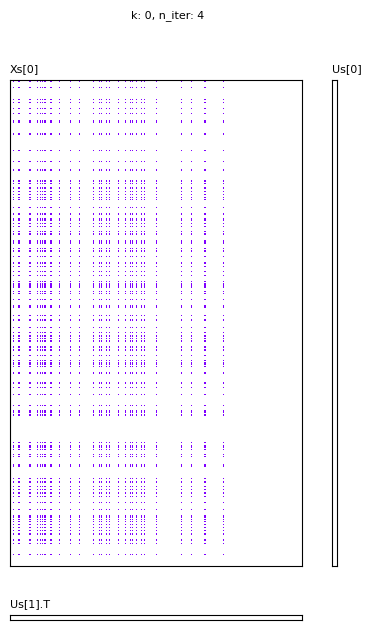

[I] k: 0, n_iter: 5


[I]     [ f0: [0] ]====[ m: [0] ]===>[ f1: 1 ]: 100%|██████████| 300/300 [00:03<00:00, 85.30it/s] 
d:\Dropbox\PyBMF\examples\..\utils\collective_evaluate_utils.py:70: RuntimeWarning: divide by zero encountered in divide
  s[0, i] = n / (1 / scores[:, i]).sum(axis=0)


[I]     break_counter: 0


[I]     [ f0: [1] ]====[ m: [0] ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:03<00:00, 99.45it/s] 


[I]     break_counter: 1
[I] Updating pattern k: 0


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 18307.18it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
0,29/02/24 12:06:14,0,5,684.500000,0.287864,0.728230,0.590218,0.412622


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1104.49it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
0,29/02/24 12:06:15,0,5,0.246361,0.676923,0.564390,0.361248


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:06:16,0,684.500000,0.287864,0.728230,0.590218,0.412622,684.500000,0.287864,0.728230,0.590218,0.412622


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:06:16,0,0.246361,0.676923,0.564390,0.361248,0.246361,0.676923,0.564390,0.361248


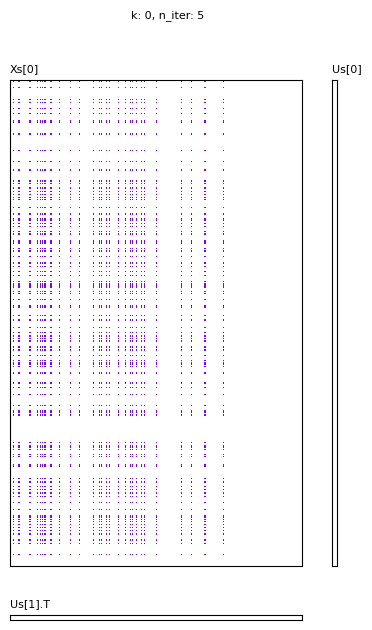

 20%|██        | 1/5 [00:47<03:08, 47.14s/it]

[I] k: 1, n_iter: 0


[I]     [ f0: 1 ]====[ m: 0 ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:02<00:00, 117.96it/s]


[I]     harmonic: 684.50 ---> 815.50
[I]     weighted: 684.50 ---> 815.50
[I]     best_idx: 13


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 39319.27it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
1,29/02/24 12:05:46,0,1,641.750000,0.275216,0.730557,0.586856,0.399814
2,29/02/24 12:05:53,0,2,680.750000,0.292507,0.723851,0.590458,0.416648
3,29/02/24 12:05:59,0,3,684.000000,0.286423,0.729608,0.590138,0.411359
4,29/02/24 12:06:05,0,4,684.500000,0.287864,0.728230,0.590218,0.412622
5,29/02/24 12:06:20,1,0,815.500000,0.334774,0.744128,0.609830,0.461793


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1159.28it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
1,29/02/24 12:05:47,0,1,0.235162,0.681818,0.562710,0.349709
2,29/02/24 12:05:53,0,2,0.253080,0.684848,0.568309,0.369583
3,29/02/24 12:06:00,0,3,0.245241,0.680124,0.564950,0.360494
4,29/02/24 12:06:06,0,4,0.246361,0.676923,0.564390,0.361248
5,29/02/24 12:06:20,1,0,0.270997,0.685552,0.573348,0.388443


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
1,29/02/24 12:05:49,0,641.750000,0.275216,0.730557,0.586856,0.399814,641.750000,0.275216,0.730557,0.586856,0.399814
2,29/02/24 12:05:55,0,680.750000,0.292507,0.723851,0.590458,0.416648,680.750000,0.292507,0.723851,0.590458,0.416648
3,29/02/24 12:06:02,0,684.000000,0.286423,0.729608,0.590138,0.411359,684.000000,0.286423,0.729608,0.590138,0.411359
4,29/02/24 12:06:07,0,684.500000,0.287864,0.728230,0.590218,0.412622,684.500000,0.287864,0.728230,0.590218,0.412622
5,29/02/24 12:06:21,1,815.500000,0.334774,0.744128,0.609830,0.461793,815.500000,0.334774,0.744128,0.609830,0.461793


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
1,29/02/24 12:05:49,0,0.235162,0.681818,0.562710,0.349709,0.235162,0.681818,0.562710,0.349709
2,29/02/24 12:05:55,0,0.253080,0.684848,0.568309,0.369583,0.253080,0.684848,0.568309,0.369583
3,29/02/24 12:06:02,0,0.245241,0.680124,0.564950,0.360494,0.245241,0.680124,0.564950,0.360494
4,29/02/24 12:06:07,0,0.246361,0.676923,0.564390,0.361248,0.246361,0.676923,0.564390,0.361248
5,29/02/24 12:06:21,1,0.270997,0.685552,0.573348,0.388443,0.270997,0.685552,0.573348,0.388443


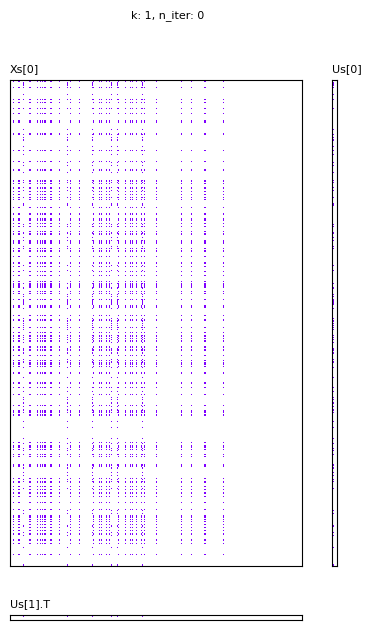

[I] k: 1, n_iter: 1


[I]     [ f0: [0] ]====[ m: [0] ]===>[ f1: 1 ]: 100%|██████████| 300/300 [00:03<00:00, 95.69it/s] 


[I]     harmonic: 815.50 ---> 819.00
[I]     weighted: 815.50 ---> 819.00
[I]     best_idx: 205


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 36429.00it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
2,29/02/24 12:05:53,0,2,680.750000,0.292507,0.723851,0.590458,0.416648
3,29/02/24 12:05:59,0,3,684.000000,0.286423,0.729608,0.590138,0.411359
4,29/02/24 12:06:05,0,4,684.500000,0.287864,0.728230,0.590218,0.412622
5,29/02/24 12:06:20,1,0,815.500000,0.334774,0.744128,0.609830,0.461793
6,29/02/24 12:06:25,1,1,819.000000,0.344060,0.726750,0.607349,0.467022


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1172.12it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
2,29/02/24 12:05:53,0,2,0.253080,0.684848,0.568309,0.369583
3,29/02/24 12:06:00,0,3,0.245241,0.680124,0.564950,0.360494
4,29/02/24 12:06:06,0,4,0.246361,0.676923,0.564390,0.361248
5,29/02/24 12:06:20,1,0,0.270997,0.685552,0.573348,0.388443
6,29/02/24 12:06:25,1,1,0.276596,0.673025,0.571109,0.392063


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
2,29/02/24 12:05:55,0,680.750000,0.292507,0.723851,0.590458,0.416648,680.750000,0.292507,0.723851,0.590458,0.416648
3,29/02/24 12:06:02,0,684.000000,0.286423,0.729608,0.590138,0.411359,684.000000,0.286423,0.729608,0.590138,0.411359
4,29/02/24 12:06:07,0,684.500000,0.287864,0.728230,0.590218,0.412622,684.500000,0.287864,0.728230,0.590218,0.412622
5,29/02/24 12:06:21,1,815.500000,0.334774,0.744128,0.609830,0.461793,815.500000,0.334774,0.744128,0.609830,0.461793
6,29/02/24 12:06:27,1,819.000000,0.344060,0.726750,0.607349,0.467022,819.000000,0.344060,0.726750,0.607349,0.467022


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
2,29/02/24 12:05:55,0,0.253080,0.684848,0.568309,0.369583,0.253080,0.684848,0.568309,0.369583
3,29/02/24 12:06:02,0,0.245241,0.680124,0.564950,0.360494,0.245241,0.680124,0.564950,0.360494
4,29/02/24 12:06:07,0,0.246361,0.676923,0.564390,0.361248,0.246361,0.676923,0.564390,0.361248
5,29/02/24 12:06:21,1,0.270997,0.685552,0.573348,0.388443,0.270997,0.685552,0.573348,0.388443
6,29/02/24 12:06:27,1,0.276596,0.673025,0.571109,0.392063,0.276596,0.673025,0.571109,0.392063


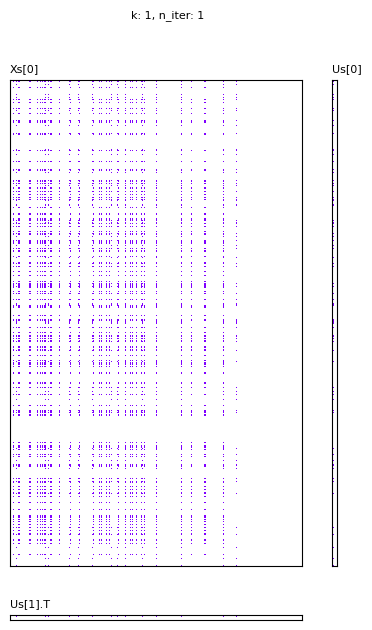

[I]     [ f0: [1] ]====[ m: [0] ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:03<00:00, 95.74it/s] 


[I]     harmonic: 819.00 ---> 843.50
[I]     weighted: 819.00 ---> 843.50
[I]     best_idx: 205


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 23045.04it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
3,29/02/24 12:05:59,0,3,684.000000,0.286423,0.729608,0.590138,0.411359
4,29/02/24 12:06:05,0,4,684.500000,0.287864,0.728230,0.590218,0.412622
5,29/02/24 12:06:20,1,0,815.500000,0.334774,0.744128,0.609830,0.461793
6,29/02/24 12:06:25,1,1,819.000000,0.344060,0.726750,0.607349,0.467022
7,29/02/24 12:06:30,1,2,843.500000,0.356228,0.732390,0.613032,0.479319


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1248.05it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
3,29/02/24 12:06:00,0,3,0.245241,0.680124,0.564950,0.360494
4,29/02/24 12:06:06,0,4,0.246361,0.676923,0.564390,0.361248
5,29/02/24 12:06:20,1,0,0.270997,0.685552,0.573348,0.388443
6,29/02/24 12:06:25,1,1,0.276596,0.673025,0.571109,0.392063
7,29/02/24 12:06:31,1,2,0.284434,0.679144,0.575028,0.400947


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
3,29/02/24 12:06:02,0,684.000000,0.286423,0.729608,0.590138,0.411359,684.000000,0.286423,0.729608,0.590138,0.411359
4,29/02/24 12:06:07,0,684.500000,0.287864,0.728230,0.590218,0.412622,684.500000,0.287864,0.728230,0.590218,0.412622
5,29/02/24 12:06:21,1,815.500000,0.334774,0.744128,0.609830,0.461793,815.500000,0.334774,0.744128,0.609830,0.461793
6,29/02/24 12:06:27,1,819.000000,0.344060,0.726750,0.607349,0.467022,819.000000,0.344060,0.726750,0.607349,0.467022
7,29/02/24 12:06:32,1,843.500000,0.356228,0.732390,0.613032,0.479319,843.500000,0.356228,0.732390,0.613032,0.479319


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
3,29/02/24 12:06:02,0,0.245241,0.680124,0.564950,0.360494,0.245241,0.680124,0.564950,0.360494
4,29/02/24 12:06:07,0,0.246361,0.676923,0.564390,0.361248,0.246361,0.676923,0.564390,0.361248
5,29/02/24 12:06:21,1,0.270997,0.685552,0.573348,0.388443,0.270997,0.685552,0.573348,0.388443
6,29/02/24 12:06:27,1,0.276596,0.673025,0.571109,0.392063,0.276596,0.673025,0.571109,0.392063
7,29/02/24 12:06:32,1,0.284434,0.679144,0.575028,0.400947,0.284434,0.679144,0.575028,0.400947


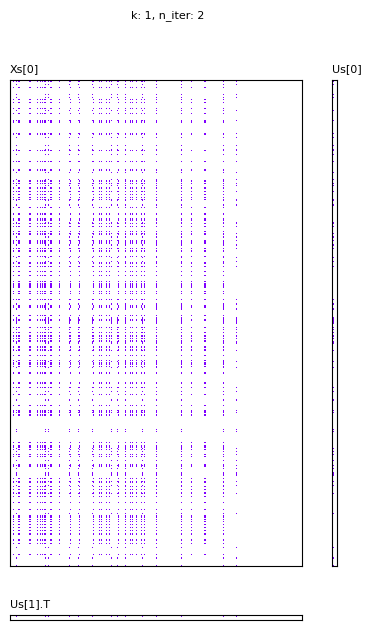

[I] k: 1, n_iter: 3


[I]     [ f0: [0] ]====[ m: [0] ]===>[ f1: 1 ]: 100%|██████████| 300/300 [00:03<00:00, 90.99it/s] 


[I]     break_counter: 0


[I]     [ f0: [1] ]====[ m: [0] ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:02<00:00, 107.23it/s]


[I]     harmonic: 843.50 ---> 849.00
[I]     weighted: 843.50 ---> 849.00
[I]     best_idx: 178


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 28618.18it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
4,29/02/24 12:06:05,0,4,684.500000,0.287864,0.728230,0.590218,0.412622
5,29/02/24 12:06:20,1,0,815.500000,0.334774,0.744128,0.609830,0.461793
6,29/02/24 12:06:25,1,1,819.000000,0.344060,0.726750,0.607349,0.467022
7,29/02/24 12:06:30,1,2,843.500000,0.356228,0.732390,0.613032,0.479319
8,29/02/24 12:06:39,1,3,849.000000,0.365834,0.729566,0.615114,0.487311


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1081.57it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
4,29/02/24 12:06:06,0,4,0.246361,0.676923,0.564390,0.361248
5,29/02/24 12:06:20,1,0,0.270997,0.685552,0.573348,0.388443
6,29/02/24 12:06:25,1,1,0.276596,0.673025,0.571109,0.392063
7,29/02/24 12:06:31,1,2,0.284434,0.679144,0.575028,0.400947
8,29/02/24 12:06:39,1,3,0.301232,0.679293,0.579507,0.417378


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
4,29/02/24 12:06:07,0,684.500000,0.287864,0.728230,0.590218,0.412622,684.500000,0.287864,0.728230,0.590218,0.412622
5,29/02/24 12:06:21,1,815.500000,0.334774,0.744128,0.609830,0.461793,815.500000,0.334774,0.744128,0.609830,0.461793
6,29/02/24 12:06:27,1,819.000000,0.344060,0.726750,0.607349,0.467022,819.000000,0.344060,0.726750,0.607349,0.467022
7,29/02/24 12:06:32,1,843.500000,0.356228,0.732390,0.613032,0.479319,843.500000,0.356228,0.732390,0.613032,0.479319
8,29/02/24 12:06:41,1,849.000000,0.365834,0.729566,0.615114,0.487311,849.000000,0.365834,0.729566,0.615114,0.487311


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
4,29/02/24 12:06:07,0,0.246361,0.676923,0.564390,0.361248,0.246361,0.676923,0.564390,0.361248
5,29/02/24 12:06:21,1,0.270997,0.685552,0.573348,0.388443,0.270997,0.685552,0.573348,0.388443
6,29/02/24 12:06:27,1,0.276596,0.673025,0.571109,0.392063,0.276596,0.673025,0.571109,0.392063
7,29/02/24 12:06:32,1,0.284434,0.679144,0.575028,0.400947,0.284434,0.679144,0.575028,0.400947
8,29/02/24 12:06:41,1,0.301232,0.679293,0.579507,0.417378,0.301232,0.679293,0.579507,0.417378


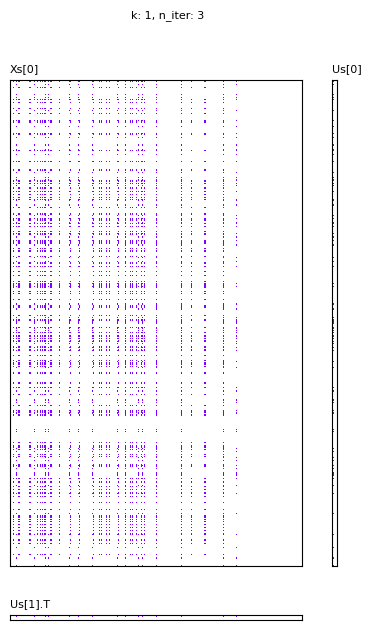

[I] k: 1, n_iter: 4


[I]     [ f0: [0] ]====[ m: [0] ]===>[ f1: 1 ]: 100%|██████████| 300/300 [00:03<00:00, 96.82it/s] 


[I]     harmonic: 849.00 ---> 849.50
[I]     weighted: 849.00 ---> 849.50
[I]     best_idx: 178


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 33280.75it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
5,29/02/24 12:06:20,1,0,815.500000,0.334774,0.744128,0.609830,0.461793
6,29/02/24 12:06:25,1,1,819.000000,0.344060,0.726750,0.607349,0.467022
7,29/02/24 12:06:30,1,2,843.500000,0.356228,0.732390,0.613032,0.479319
8,29/02/24 12:06:39,1,3,849.000000,0.365834,0.729566,0.615114,0.487311
9,29/02/24 12:06:45,1,4,849.500000,0.361992,0.729826,0.613993,0.483947


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1061.18it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
5,29/02/24 12:06:20,1,0,0.270997,0.685552,0.573348,0.388443
6,29/02/24 12:06:25,1,1,0.276596,0.673025,0.571109,0.392063
7,29/02/24 12:06:31,1,2,0.284434,0.679144,0.575028,0.400947
8,29/02/24 12:06:39,1,3,0.301232,0.679293,0.579507,0.417378
9,29/02/24 12:06:45,1,4,0.297872,0.678571,0.578387,0.414008


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
5,29/02/24 12:06:21,1,815.500000,0.334774,0.744128,0.609830,0.461793,815.500000,0.334774,0.744128,0.609830,0.461793
6,29/02/24 12:06:27,1,819.000000,0.344060,0.726750,0.607349,0.467022,819.000000,0.344060,0.726750,0.607349,0.467022
7,29/02/24 12:06:32,1,843.500000,0.356228,0.732390,0.613032,0.479319,843.500000,0.356228,0.732390,0.613032,0.479319
8,29/02/24 12:06:41,1,849.000000,0.365834,0.729566,0.615114,0.487311,849.000000,0.365834,0.729566,0.615114,0.487311
9,29/02/24 12:06:47,1,849.500000,0.361992,0.729826,0.613993,0.483947,849.500000,0.361992,0.729826,0.613993,0.483947


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
5,29/02/24 12:06:21,1,0.270997,0.685552,0.573348,0.388443,0.270997,0.685552,0.573348,0.388443
6,29/02/24 12:06:27,1,0.276596,0.673025,0.571109,0.392063,0.276596,0.673025,0.571109,0.392063
7,29/02/24 12:06:32,1,0.284434,0.679144,0.575028,0.400947,0.284434,0.679144,0.575028,0.400947
8,29/02/24 12:06:41,1,0.301232,0.679293,0.579507,0.417378,0.301232,0.679293,0.579507,0.417378
9,29/02/24 12:06:47,1,0.297872,0.678571,0.578387,0.414008,0.297872,0.678571,0.578387,0.414008


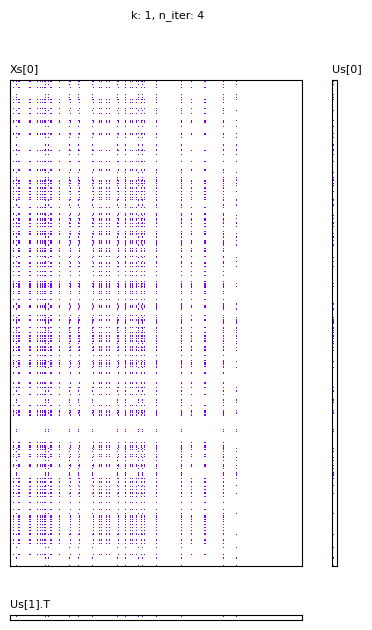

[I]     [ f0: [1] ]====[ m: [0] ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:03<00:00, 98.09it/s] 


[I]     harmonic: 849.50 ---> 850.50
[I]     weighted: 849.50 ---> 850.50
[I]     best_idx: 178


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 36417.40it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
6,29/02/24 12:06:25,1,1,819.000000,0.344060,0.726750,0.607349,0.467022
7,29/02/24 12:06:30,1,2,843.500000,0.356228,0.732390,0.613032,0.479319
8,29/02/24 12:06:39,1,3,849.000000,0.365834,0.729566,0.615114,0.487311
9,29/02/24 12:06:45,1,4,849.500000,0.361992,0.729826,0.613993,0.483947
10,29/02/24 12:06:50,1,5,850.500000,0.361031,0.730010,0.613753,0.483128


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 938.24it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
6,29/02/24 12:06:25,1,1,0.276596,0.673025,0.571109,0.392063
7,29/02/24 12:06:31,1,2,0.284434,0.679144,0.575028,0.400947
8,29/02/24 12:06:39,1,3,0.301232,0.679293,0.579507,0.417378
9,29/02/24 12:06:45,1,4,0.297872,0.678571,0.578387,0.414008
10,29/02/24 12:06:51,1,5,0.291153,0.673575,0.575028,0.406568


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
6,29/02/24 12:06:27,1,819.000000,0.344060,0.726750,0.607349,0.467022,819.000000,0.344060,0.726750,0.607349,0.467022
7,29/02/24 12:06:32,1,843.500000,0.356228,0.732390,0.613032,0.479319,843.500000,0.356228,0.732390,0.613032,0.479319
8,29/02/24 12:06:41,1,849.000000,0.365834,0.729566,0.615114,0.487311,849.000000,0.365834,0.729566,0.615114,0.487311
9,29/02/24 12:06:47,1,849.500000,0.361992,0.729826,0.613993,0.483947,849.500000,0.361992,0.729826,0.613993,0.483947
10,29/02/24 12:06:53,1,850.500000,0.361031,0.730010,0.613753,0.483128,850.500000,0.361031,0.730010,0.613753,0.483128


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
6,29/02/24 12:06:27,1,0.276596,0.673025,0.571109,0.392063,0.276596,0.673025,0.571109,0.392063
7,29/02/24 12:06:32,1,0.284434,0.679144,0.575028,0.400947,0.284434,0.679144,0.575028,0.400947
8,29/02/24 12:06:41,1,0.301232,0.679293,0.579507,0.417378,0.301232,0.679293,0.579507,0.417378
9,29/02/24 12:06:47,1,0.297872,0.678571,0.578387,0.414008,0.297872,0.678571,0.578387,0.414008
10,29/02/24 12:06:53,1,0.291153,0.673575,0.575028,0.406568,0.291153,0.673575,0.575028,0.406568


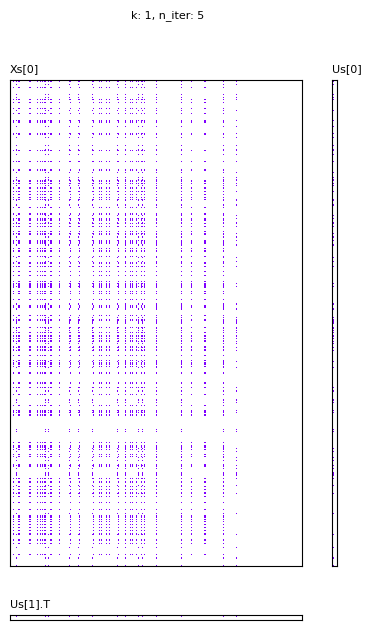

[I] k: 1, n_iter: 6


[I]     [ f0: [0] ]====[ m: [0] ]===>[ f1: 1 ]: 100%|██████████| 300/300 [00:03<00:00, 86.52it/s] 


[I]     break_counter: 0


[I]     [ f0: [1] ]====[ m: [0] ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:02<00:00, 123.03it/s]


[I]     break_counter: 1
[I] Updating pattern k: 1


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 37631.80it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
0,29/02/24 12:06:14,0,5,684.500000,0.287864,0.728230,0.590218,0.412622
1,29/02/24 12:06:59,1,6,850.500000,0.361031,0.730010,0.613753,0.483128


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1187.03it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
0,29/02/24 12:06:15,0,5,0.246361,0.676923,0.564390,0.361248
1,29/02/24 12:06:59,1,6,0.291153,0.673575,0.575028,0.406568


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:06:16,0,684.500000,0.287864,0.728230,0.590218,0.412622,684.500000,0.287864,0.728230,0.590218,0.412622
1,29/02/24 12:07:01,1,850.500000,0.361031,0.730010,0.613753,0.483128,850.500000,0.361031,0.730010,0.613753,0.483128


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:06:16,0,0.246361,0.676923,0.564390,0.361248,0.246361,0.676923,0.564390,0.361248
1,29/02/24 12:07:01,1,0.291153,0.673575,0.575028,0.406568,0.291153,0.673575,0.575028,0.406568


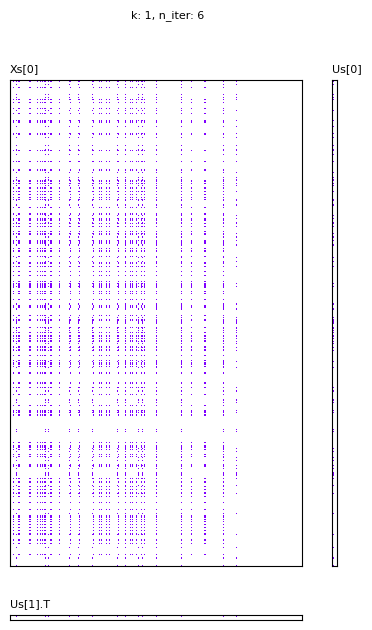

 40%|████      | 2/5 [01:31<02:16, 45.47s/it]

[I] k: 2, n_iter: 0


[I]     [ f0: 1 ]====[ m: 0 ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:02<00:00, 121.51it/s]


[I]     harmonic: 850.50 ---> 953.00
[I]     weighted: 850.50 ---> 953.00
[I]     best_idx: 86


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 32251.56it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
7,29/02/24 12:06:30,1,2,843.500000,0.356228,0.732390,0.613032,0.479319
8,29/02/24 12:06:39,1,3,849.000000,0.365834,0.729566,0.615114,0.487311
9,29/02/24 12:06:45,1,4,849.500000,0.361992,0.729826,0.613993,0.483947
10,29/02/24 12:06:50,1,5,850.500000,0.361031,0.730010,0.613753,0.483128
11,29/02/24 12:07:04,2,0,953.000000,0.411143,0.727479,0.628562,0.525368


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1055.48it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
7,29/02/24 12:06:31,1,2,0.284434,0.679144,0.575028,0.400947
8,29/02/24 12:06:39,1,3,0.301232,0.679293,0.579507,0.417378
9,29/02/24 12:06:45,1,4,0.297872,0.678571,0.578387,0.414008
10,29/02/24 12:06:51,1,5,0.291153,0.673575,0.575028,0.406568
11,29/02/24 12:07:04,2,0,0.321389,0.672131,0.582307,0.434848


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
7,29/02/24 12:06:32,1,843.500000,0.356228,0.732390,0.613032,0.479319,843.500000,0.356228,0.732390,0.613032,0.479319
8,29/02/24 12:06:41,1,849.000000,0.365834,0.729566,0.615114,0.487311,849.000000,0.365834,0.729566,0.615114,0.487311
9,29/02/24 12:06:47,1,849.500000,0.361992,0.729826,0.613993,0.483947,849.500000,0.361992,0.729826,0.613993,0.483947
10,29/02/24 12:06:53,1,850.500000,0.361031,0.730010,0.613753,0.483128,850.500000,0.361031,0.730010,0.613753,0.483128
11,29/02/24 12:07:06,2,953.000000,0.411143,0.727479,0.628562,0.525368,953.000000,0.411143,0.727479,0.628562,0.525368


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
7,29/02/24 12:06:32,1,0.284434,0.679144,0.575028,0.400947,0.284434,0.679144,0.575028,0.400947
8,29/02/24 12:06:41,1,0.301232,0.679293,0.579507,0.417378,0.301232,0.679293,0.579507,0.417378
9,29/02/24 12:06:47,1,0.297872,0.678571,0.578387,0.414008,0.297872,0.678571,0.578387,0.414008
10,29/02/24 12:06:53,1,0.291153,0.673575,0.575028,0.406568,0.291153,0.673575,0.575028,0.406568
11,29/02/24 12:07:06,2,0.321389,0.672131,0.582307,0.434848,0.321389,0.672131,0.582307,0.434848


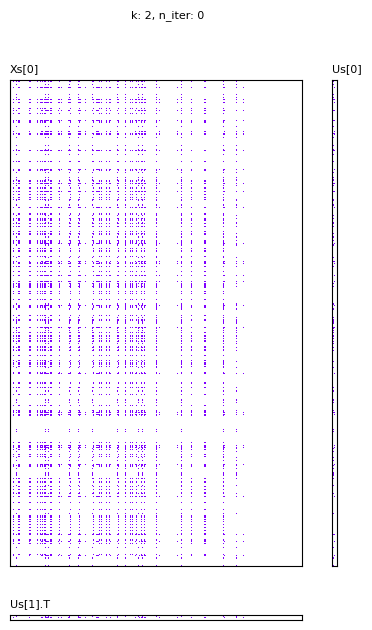

[I] k: 2, n_iter: 1


[I]     [ f0: [0] ]====[ m: [0] ]===>[ f1: 1 ]: 100%|██████████| 300/300 [00:03<00:00, 90.91it/s] 


[I]     harmonic: 953.00 ---> 966.25
[I]     weighted: 953.00 ---> 966.25
[I]     best_idx: 214


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 34546.83it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
8,29/02/24 12:06:39,1,3,849.000000,0.365834,0.729566,0.615114,0.487311
9,29/02/24 12:06:45,1,4,849.500000,0.361992,0.729826,0.613993,0.483947
10,29/02/24 12:06:50,1,5,850.500000,0.361031,0.730010,0.613753,0.483128
11,29/02/24 12:07:04,2,0,953.000000,0.411143,0.727479,0.628562,0.525368
12,29/02/24 12:07:10,2,1,966.250000,0.415306,0.733183,0.632085,0.530253


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1028.18it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
8,29/02/24 12:06:39,1,3,0.301232,0.679293,0.579507,0.417378
9,29/02/24 12:06:45,1,4,0.297872,0.678571,0.578387,0.414008
10,29/02/24 12:06:51,1,5,0.291153,0.673575,0.575028,0.406568
11,29/02/24 12:07:04,2,0,0.321389,0.672131,0.582307,0.434848
12,29/02/24 12:07:10,2,1,0.326988,0.679070,0.586226,0.441421


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
8,29/02/24 12:06:41,1,849.000000,0.365834,0.729566,0.615114,0.487311,849.000000,0.365834,0.729566,0.615114,0.487311
9,29/02/24 12:06:47,1,849.500000,0.361992,0.729826,0.613993,0.483947,849.500000,0.361992,0.729826,0.613993,0.483947
10,29/02/24 12:06:53,1,850.500000,0.361031,0.730010,0.613753,0.483128,850.500000,0.361031,0.730010,0.613753,0.483128
11,29/02/24 12:07:06,2,953.000000,0.411143,0.727479,0.628562,0.525368,953.000000,0.411143,0.727479,0.628562,0.525368
12,29/02/24 12:07:12,2,966.250000,0.415306,0.733183,0.632085,0.530253,966.250000,0.415306,0.733183,0.632085,0.530253


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
8,29/02/24 12:06:41,1,0.301232,0.679293,0.579507,0.417378,0.301232,0.679293,0.579507,0.417378
9,29/02/24 12:06:47,1,0.297872,0.678571,0.578387,0.414008,0.297872,0.678571,0.578387,0.414008
10,29/02/24 12:06:53,1,0.291153,0.673575,0.575028,0.406568,0.291153,0.673575,0.575028,0.406568
11,29/02/24 12:07:06,2,0.321389,0.672131,0.582307,0.434848,0.321389,0.672131,0.582307,0.434848
12,29/02/24 12:07:12,2,0.326988,0.679070,0.586226,0.441421,0.326988,0.679070,0.586226,0.441421


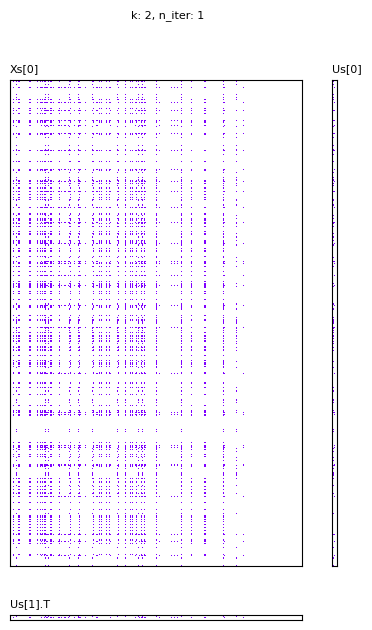

[I]     [ f0: [1] ]====[ m: [0] ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:02<00:00, 101.93it/s]


[I]     harmonic: 966.25 ---> 970.00
[I]     weighted: 966.25 ---> 970.00
[I]     best_idx: 214


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 24609.86it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
9,29/02/24 12:06:45,1,4,849.500000,0.361992,0.729826,0.613993,0.483947
10,29/02/24 12:06:50,1,5,850.500000,0.361031,0.730010,0.613753,0.483128
11,29/02/24 12:07:04,2,0,953.000000,0.411143,0.727479,0.628562,0.525368
12,29/02/24 12:07:10,2,1,966.250000,0.415306,0.733183,0.632085,0.530253
13,29/02/24 12:07:15,2,2,970.000000,0.418668,0.732904,0.633045,0.532912


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 893.90it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
9,29/02/24 12:06:45,1,4,0.297872,0.678571,0.578387,0.414008
10,29/02/24 12:06:51,1,5,0.291153,0.673575,0.575028,0.406568
11,29/02/24 12:07:04,2,0,0.321389,0.672131,0.582307,0.434848
12,29/02/24 12:07:10,2,1,0.326988,0.679070,0.586226,0.441421
13,29/02/24 12:07:16,2,2,0.331467,0.682028,0.588466,0.446119


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
9,29/02/24 12:06:47,1,849.500000,0.361992,0.729826,0.613993,0.483947,849.500000,0.361992,0.729826,0.613993,0.483947
10,29/02/24 12:06:53,1,850.500000,0.361031,0.730010,0.613753,0.483128,850.500000,0.361031,0.730010,0.613753,0.483128
11,29/02/24 12:07:06,2,953.000000,0.411143,0.727479,0.628562,0.525368,953.000000,0.411143,0.727479,0.628562,0.525368
12,29/02/24 12:07:12,2,966.250000,0.415306,0.733183,0.632085,0.530253,966.250000,0.415306,0.733183,0.632085,0.530253
13,29/02/24 12:07:18,2,970.000000,0.418668,0.732904,0.633045,0.532912,970.000000,0.418668,0.732904,0.633045,0.532912


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
9,29/02/24 12:06:47,1,0.297872,0.678571,0.578387,0.414008,0.297872,0.678571,0.578387,0.414008
10,29/02/24 12:06:53,1,0.291153,0.673575,0.575028,0.406568,0.291153,0.673575,0.575028,0.406568
11,29/02/24 12:07:06,2,0.321389,0.672131,0.582307,0.434848,0.321389,0.672131,0.582307,0.434848
12,29/02/24 12:07:12,2,0.326988,0.679070,0.586226,0.441421,0.326988,0.679070,0.586226,0.441421
13,29/02/24 12:07:18,2,0.331467,0.682028,0.588466,0.446119,0.331467,0.682028,0.588466,0.446119


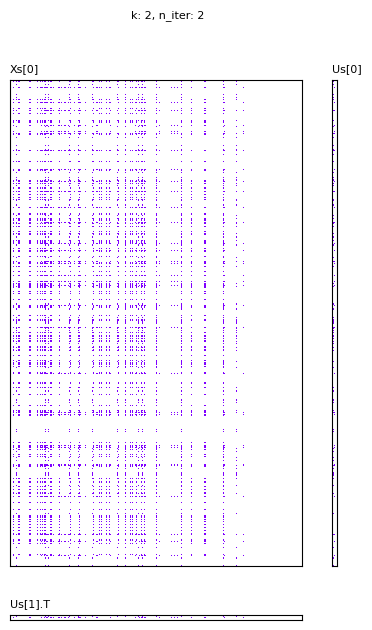

[I] k: 2, n_iter: 3


[I]     [ f0: [0] ]====[ m: [0] ]===>[ f1: 1 ]: 100%|██████████| 300/300 [00:03<00:00, 88.84it/s] 


[I]     harmonic: 970.00 ---> 970.75
[I]     weighted: 970.00 ---> 970.75
[I]     best_idx: 214


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 35397.27it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
10,29/02/24 12:06:50,1,5,850.500000,0.361031,0.730010,0.613753,0.483128
11,29/02/24 12:07:04,2,0,953.000000,0.411143,0.727479,0.628562,0.525368
12,29/02/24 12:07:10,2,1,966.250000,0.415306,0.733183,0.632085,0.530253
13,29/02/24 12:07:15,2,2,970.000000,0.418668,0.732904,0.633045,0.532912
14,29/02/24 12:07:21,2,3,970.750000,0.418028,0.732604,0.632725,0.532314


[I] Making predictions: 100%|██████████| 1786/1786 [00:02<00:00, 818.73it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
10,29/02/24 12:06:51,1,5,0.291153,0.673575,0.575028,0.406568
11,29/02/24 12:07:04,2,0,0.321389,0.672131,0.582307,0.434848
12,29/02/24 12:07:10,2,1,0.326988,0.679070,0.586226,0.441421
13,29/02/24 12:07:16,2,2,0.331467,0.682028,0.588466,0.446119
14,29/02/24 12:07:22,2,3,0.330347,0.684455,0.589026,0.445619


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
10,29/02/24 12:06:53,1,850.500000,0.361031,0.730010,0.613753,0.483128,850.500000,0.361031,0.730010,0.613753,0.483128
11,29/02/24 12:07:06,2,953.000000,0.411143,0.727479,0.628562,0.525368,953.000000,0.411143,0.727479,0.628562,0.525368
12,29/02/24 12:07:12,2,966.250000,0.415306,0.733183,0.632085,0.530253,966.250000,0.415306,0.733183,0.632085,0.530253
13,29/02/24 12:07:18,2,970.000000,0.418668,0.732904,0.633045,0.532912,970.000000,0.418668,0.732904,0.633045,0.532912
14,29/02/24 12:07:24,2,970.750000,0.418028,0.732604,0.632725,0.532314,970.750000,0.418028,0.732604,0.632725,0.532314


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
10,29/02/24 12:06:53,1,0.291153,0.673575,0.575028,0.406568,0.291153,0.673575,0.575028,0.406568
11,29/02/24 12:07:06,2,0.321389,0.672131,0.582307,0.434848,0.321389,0.672131,0.582307,0.434848
12,29/02/24 12:07:12,2,0.326988,0.679070,0.586226,0.441421,0.326988,0.679070,0.586226,0.441421
13,29/02/24 12:07:18,2,0.331467,0.682028,0.588466,0.446119,0.331467,0.682028,0.588466,0.446119
14,29/02/24 12:07:24,2,0.330347,0.684455,0.589026,0.445619,0.330347,0.684455,0.589026,0.445619


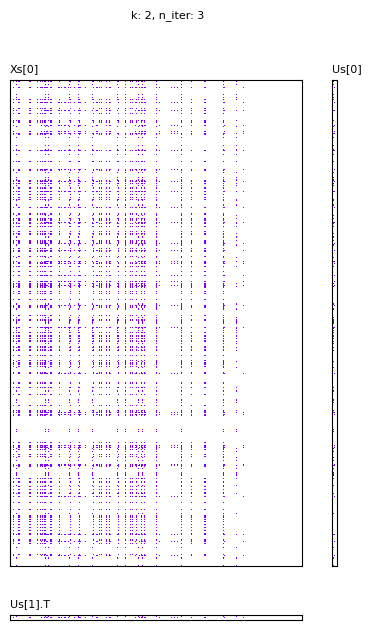

[I]     [ f0: [1] ]====[ m: [0] ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:02<00:00, 103.05it/s]


[I]     harmonic: 970.75 ---> 971.50
[I]     weighted: 970.75 ---> 971.50
[I]     best_idx: 86


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 38971.07it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
11,29/02/24 12:07:04,2,0,953.000000,0.411143,0.727479,0.628562,0.525368
12,29/02/24 12:07:10,2,1,966.250000,0.415306,0.733183,0.632085,0.530253
13,29/02/24 12:07:15,2,2,970.000000,0.418668,0.732904,0.633045,0.532912
14,29/02/24 12:07:21,2,3,970.750000,0.418028,0.732604,0.632725,0.532314
15,29/02/24 12:07:27,2,4,971.500000,0.414825,0.731508,0.631284,0.529424


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1073.00it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
11,29/02/24 12:07:04,2,0,0.321389,0.672131,0.582307,0.434848
12,29/02/24 12:07:10,2,1,0.326988,0.679070,0.586226,0.441421
13,29/02/24 12:07:16,2,2,0.331467,0.682028,0.588466,0.446119
14,29/02/24 12:07:22,2,3,0.330347,0.684455,0.589026,0.445619
15,29/02/24 12:07:28,2,4,0.328108,0.679814,0.586786,0.442598


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
11,29/02/24 12:07:06,2,953.000000,0.411143,0.727479,0.628562,0.525368,953.000000,0.411143,0.727479,0.628562,0.525368
12,29/02/24 12:07:12,2,966.250000,0.415306,0.733183,0.632085,0.530253,966.250000,0.415306,0.733183,0.632085,0.530253
13,29/02/24 12:07:18,2,970.000000,0.418668,0.732904,0.633045,0.532912,970.000000,0.418668,0.732904,0.633045,0.532912
14,29/02/24 12:07:24,2,970.750000,0.418028,0.732604,0.632725,0.532314,970.750000,0.418028,0.732604,0.632725,0.532314
15,29/02/24 12:07:29,2,971.500000,0.414825,0.731508,0.631284,0.529424,971.500000,0.414825,0.731508,0.631284,0.529424


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
11,29/02/24 12:07:06,2,0.321389,0.672131,0.582307,0.434848,0.321389,0.672131,0.582307,0.434848
12,29/02/24 12:07:12,2,0.326988,0.679070,0.586226,0.441421,0.326988,0.679070,0.586226,0.441421
13,29/02/24 12:07:18,2,0.331467,0.682028,0.588466,0.446119,0.331467,0.682028,0.588466,0.446119
14,29/02/24 12:07:24,2,0.330347,0.684455,0.589026,0.445619,0.330347,0.684455,0.589026,0.445619
15,29/02/24 12:07:29,2,0.328108,0.679814,0.586786,0.442598,0.328108,0.679814,0.586786,0.442598


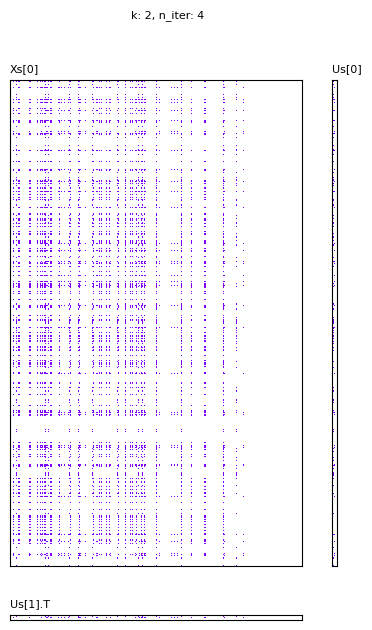

[I] k: 2, n_iter: 5


[I]     [ f0: [0] ]====[ m: [0] ]===>[ f1: 1 ]: 100%|██████████| 300/300 [00:03<00:00, 91.97it/s] 


[I]     harmonic: 971.50 ---> 973.00
[I]     weighted: 971.50 ---> 973.00
[I]     best_idx: 252


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 32108.57it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
12,29/02/24 12:07:10,2,1,966.250000,0.415306,0.733183,0.632085,0.530253
13,29/02/24 12:07:15,2,2,970.000000,0.418668,0.732904,0.633045,0.532912
14,29/02/24 12:07:21,2,3,970.750000,0.418028,0.732604,0.632725,0.532314
15,29/02/24 12:07:27,2,4,971.500000,0.414825,0.731508,0.631284,0.529424
16,29/02/24 12:07:33,2,5,973.000000,0.416747,0.732620,0.632325,0.531279


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 979.33it/s] 


,time,k,iter,Recall,Precision,Accuracy,F1
12,29/02/24 12:07:10,2,1,0.326988,0.679070,0.586226,0.441421
13,29/02/24 12:07:16,2,2,0.331467,0.682028,0.588466,0.446119
14,29/02/24 12:07:22,2,3,0.330347,0.684455,0.589026,0.445619
15,29/02/24 12:07:28,2,4,0.328108,0.679814,0.586786,0.442598
16,29/02/24 12:07:34,2,5,0.329227,0.680556,0.587346,0.443774


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
12,29/02/24 12:07:12,2,966.250000,0.415306,0.733183,0.632085,0.530253,966.250000,0.415306,0.733183,0.632085,0.530253
13,29/02/24 12:07:18,2,970.000000,0.418668,0.732904,0.633045,0.532912,970.000000,0.418668,0.732904,0.633045,0.532912
14,29/02/24 12:07:24,2,970.750000,0.418028,0.732604,0.632725,0.532314,970.750000,0.418028,0.732604,0.632725,0.532314
15,29/02/24 12:07:29,2,971.500000,0.414825,0.731508,0.631284,0.529424,971.500000,0.414825,0.731508,0.631284,0.529424
16,29/02/24 12:07:35,2,973.000000,0.416747,0.732620,0.632325,0.531279,973.000000,0.416747,0.732620,0.632325,0.531279


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
12,29/02/24 12:07:12,2,0.326988,0.679070,0.586226,0.441421,0.326988,0.679070,0.586226,0.441421
13,29/02/24 12:07:18,2,0.331467,0.682028,0.588466,0.446119,0.331467,0.682028,0.588466,0.446119
14,29/02/24 12:07:24,2,0.330347,0.684455,0.589026,0.445619,0.330347,0.684455,0.589026,0.445619
15,29/02/24 12:07:29,2,0.328108,0.679814,0.586786,0.442598,0.328108,0.679814,0.586786,0.442598
16,29/02/24 12:07:35,2,0.329227,0.680556,0.587346,0.443774,0.329227,0.680556,0.587346,0.443774


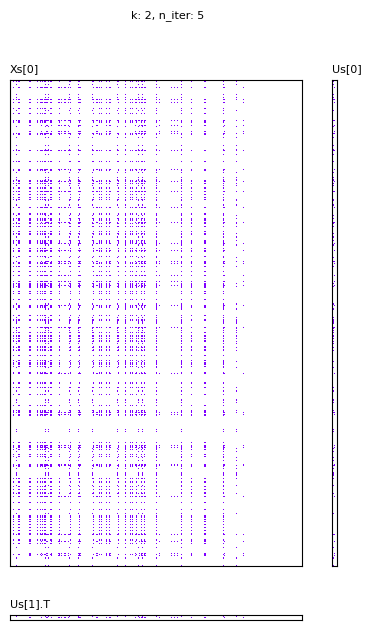

[I]     [ f0: [1] ]====[ m: [0] ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:03<00:00, 98.88it/s] 


[I]     break_counter: 0
[I] k: 2, n_iter: 6


[I]     [ f0: [0] ]====[ m: [0] ]===>[ f1: 1 ]: 100%|██████████| 300/300 [00:03<00:00, 88.96it/s] 


[I]     harmonic: 973.00 ---> 973.75
[I]     weighted: 973.00 ---> 973.75
[I]     best_idx: 202


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 25731.61it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
13,29/02/24 12:07:15,2,2,970.000000,0.418668,0.732904,0.633045,0.532912
14,29/02/24 12:07:21,2,3,970.750000,0.418028,0.732604,0.632725,0.532314
15,29/02/24 12:07:27,2,4,971.500000,0.414825,0.731508,0.631284,0.529424
16,29/02/24 12:07:33,2,5,973.000000,0.416747,0.732620,0.632325,0.531279
17,29/02/24 12:07:42,2,6,973.750000,0.412264,0.736345,0.632325,0.528585


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1214.22it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
13,29/02/24 12:07:16,2,2,0.331467,0.682028,0.588466,0.446119
14,29/02/24 12:07:22,2,3,0.330347,0.684455,0.589026,0.445619
15,29/02/24 12:07:28,2,4,0.328108,0.679814,0.586786,0.442598
16,29/02/24 12:07:34,2,5,0.329227,0.680556,0.587346,0.443774
17,29/02/24 12:07:43,2,6,0.326988,0.685446,0.588466,0.442760


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
13,29/02/24 12:07:18,2,970.000000,0.418668,0.732904,0.633045,0.532912,970.000000,0.418668,0.732904,0.633045,0.532912
14,29/02/24 12:07:24,2,970.750000,0.418028,0.732604,0.632725,0.532314,970.750000,0.418028,0.732604,0.632725,0.532314
15,29/02/24 12:07:29,2,971.500000,0.414825,0.731508,0.631284,0.529424,971.500000,0.414825,0.731508,0.631284,0.529424
16,29/02/24 12:07:35,2,973.000000,0.416747,0.732620,0.632325,0.531279,973.000000,0.416747,0.732620,0.632325,0.531279
17,29/02/24 12:07:44,2,973.750000,0.412264,0.736345,0.632325,0.528585,973.750000,0.412264,0.736345,0.632325,0.528585


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
13,29/02/24 12:07:18,2,0.331467,0.682028,0.588466,0.446119,0.331467,0.682028,0.588466,0.446119
14,29/02/24 12:07:24,2,0.330347,0.684455,0.589026,0.445619,0.330347,0.684455,0.589026,0.445619
15,29/02/24 12:07:29,2,0.328108,0.679814,0.586786,0.442598,0.328108,0.679814,0.586786,0.442598
16,29/02/24 12:07:35,2,0.329227,0.680556,0.587346,0.443774,0.329227,0.680556,0.587346,0.443774
17,29/02/24 12:07:44,2,0.326988,0.685446,0.588466,0.442760,0.326988,0.685446,0.588466,0.442760


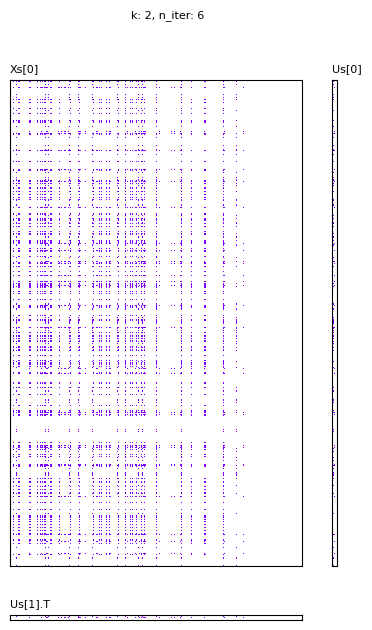

[I]     [ f0: [1] ]====[ m: [0] ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:02<00:00, 111.07it/s]


[I]     break_counter: 0
[I] k: 2, n_iter: 7


[I]     [ f0: [0] ]====[ m: [0] ]===>[ f1: 1 ]: 100%|██████████| 300/300 [00:02<00:00, 100.35it/s]


[I]     break_counter: 1
[I] Updating pattern k: 2


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 32493.78it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
0,29/02/24 12:06:14,0,5,684.500000,0.287864,0.728230,0.590218,0.412622
1,29/02/24 12:06:59,1,6,850.500000,0.361031,0.730010,0.613753,0.483128
2,29/02/24 12:07:50,2,7,973.750000,0.412264,0.736345,0.632325,0.528585


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1390.07it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
0,29/02/24 12:06:15,0,5,0.246361,0.676923,0.564390,0.361248
1,29/02/24 12:06:59,1,6,0.291153,0.673575,0.575028,0.406568
2,29/02/24 12:07:51,2,7,0.326988,0.685446,0.588466,0.442760


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:06:16,0,684.500000,0.287864,0.728230,0.590218,0.412622,684.500000,0.287864,0.728230,0.590218,0.412622
1,29/02/24 12:07:01,1,850.500000,0.361031,0.730010,0.613753,0.483128,850.500000,0.361031,0.730010,0.613753,0.483128
2,29/02/24 12:07:52,2,973.750000,0.412264,0.736345,0.632325,0.528585,973.750000,0.412264,0.736345,0.632325,0.528585


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:06:16,0,0.246361,0.676923,0.564390,0.361248,0.246361,0.676923,0.564390,0.361248
1,29/02/24 12:07:01,1,0.291153,0.673575,0.575028,0.406568,0.291153,0.673575,0.575028,0.406568
2,29/02/24 12:07:52,2,0.326988,0.685446,0.588466,0.442760,0.326988,0.685446,0.588466,0.442760


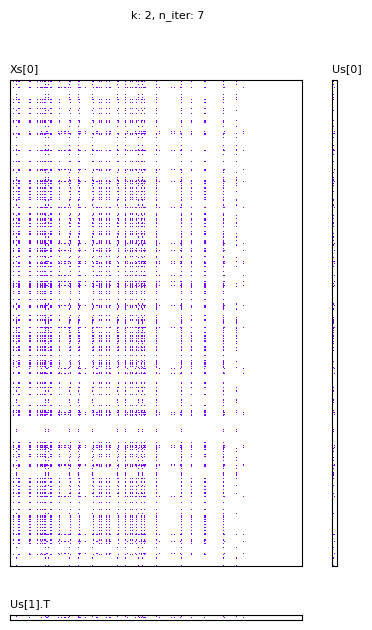

 60%|██████    | 3/5 [02:22<01:35, 48.00s/it]

[I] k: 3, n_iter: 0


[I]     [ f0: 1 ]====[ m: 0 ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:02<00:00, 117.52it/s]


[I]     harmonic: 973.75 ---> 1069.00
[I]     weighted: 973.75 ---> 1069.00
[I]     best_idx: 13


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 26123.82it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
14,29/02/24 12:07:21,2,3,970.750000,0.418028,0.732604,0.632725,0.532314
15,29/02/24 12:07:27,2,4,971.500000,0.414825,0.731508,0.631284,0.529424
16,29/02/24 12:07:33,2,5,973.000000,0.416747,0.732620,0.632325,0.531279
17,29/02/24 12:07:42,2,6,973.750000,0.412264,0.736345,0.632325,0.528585
18,29/02/24 12:07:55,3,0,1069.000000,0.447326,0.745067,0.647134,0.559024


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1230.29it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
14,29/02/24 12:07:22,2,3,0.330347,0.684455,0.589026,0.445619
15,29/02/24 12:07:28,2,4,0.328108,0.679814,0.586786,0.442598
16,29/02/24 12:07:34,2,5,0.329227,0.680556,0.587346,0.443774
17,29/02/24 12:07:43,2,6,0.326988,0.685446,0.588466,0.442760
18,29/02/24 12:07:55,3,0,0.346025,0.689732,0.595185,0.460850


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
14,29/02/24 12:07:24,2,970.750000,0.418028,0.732604,0.632725,0.532314,970.750000,0.418028,0.732604,0.632725,0.532314
15,29/02/24 12:07:29,2,971.500000,0.414825,0.731508,0.631284,0.529424,971.500000,0.414825,0.731508,0.631284,0.529424
16,29/02/24 12:07:35,2,973.000000,0.416747,0.732620,0.632325,0.531279,973.000000,0.416747,0.732620,0.632325,0.531279
17,29/02/24 12:07:44,2,973.750000,0.412264,0.736345,0.632325,0.528585,973.750000,0.412264,0.736345,0.632325,0.528585
18,29/02/24 12:07:57,3,1069.000000,0.447326,0.745067,0.647134,0.559024,1069.000000,0.447326,0.745067,0.647134,0.559024


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
14,29/02/24 12:07:24,2,0.330347,0.684455,0.589026,0.445619,0.330347,0.684455,0.589026,0.445619
15,29/02/24 12:07:29,2,0.328108,0.679814,0.586786,0.442598,0.328108,0.679814,0.586786,0.442598
16,29/02/24 12:07:35,2,0.329227,0.680556,0.587346,0.443774,0.329227,0.680556,0.587346,0.443774
17,29/02/24 12:07:44,2,0.326988,0.685446,0.588466,0.442760,0.326988,0.685446,0.588466,0.442760
18,29/02/24 12:07:57,3,0.346025,0.689732,0.595185,0.460850,0.346025,0.689732,0.595185,0.460850


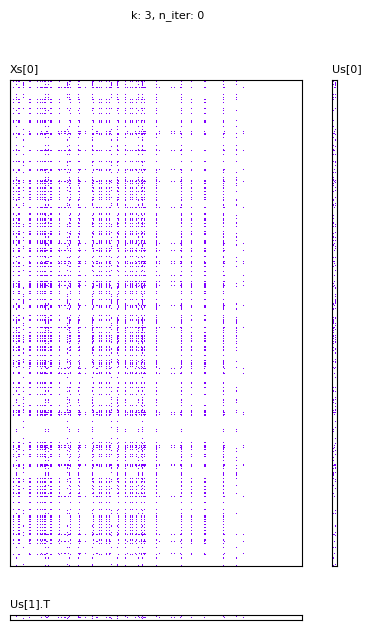

[I] k: 3, n_iter: 1


[I]     [ f0: [0] ]====[ m: [0] ]===>[ f1: 1 ]: 100%|██████████| 300/300 [00:03<00:00, 92.28it/s] 


[I]     break_counter: 0


[I]     [ f0: [1] ]====[ m: [0] ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:03<00:00, 94.47it/s] 


[I]     break_counter: 1
[I] Updating pattern k: 3


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 31606.55it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
0,29/02/24 12:06:14,0,5,684.500000,0.287864,0.728230,0.590218,0.412622
1,29/02/24 12:06:59,1,6,850.500000,0.361031,0.730010,0.613753,0.483128
2,29/02/24 12:07:50,2,7,973.750000,0.412264,0.736345,0.632325,0.528585
3,29/02/24 12:08:04,3,1,1069.000000,0.447326,0.745067,0.647134,0.559024


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1151.25it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
0,29/02/24 12:06:15,0,5,0.246361,0.676923,0.564390,0.361248
1,29/02/24 12:06:59,1,6,0.291153,0.673575,0.575028,0.406568
2,29/02/24 12:07:51,2,7,0.326988,0.685446,0.588466,0.442760
3,29/02/24 12:08:04,3,1,0.346025,0.689732,0.595185,0.460850


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:06:16,0,684.500000,0.287864,0.728230,0.590218,0.412622,684.500000,0.287864,0.728230,0.590218,0.412622
1,29/02/24 12:07:01,1,850.500000,0.361031,0.730010,0.613753,0.483128,850.500000,0.361031,0.730010,0.613753,0.483128
2,29/02/24 12:07:52,2,973.750000,0.412264,0.736345,0.632325,0.528585,973.750000,0.412264,0.736345,0.632325,0.528585
3,29/02/24 12:08:06,3,1069.000000,0.447326,0.745067,0.647134,0.559024,1069.000000,0.447326,0.745067,0.647134,0.559024


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:06:16,0,0.246361,0.676923,0.564390,0.361248,0.246361,0.676923,0.564390,0.361248
1,29/02/24 12:07:01,1,0.291153,0.673575,0.575028,0.406568,0.291153,0.673575,0.575028,0.406568
2,29/02/24 12:07:52,2,0.326988,0.685446,0.588466,0.442760,0.326988,0.685446,0.588466,0.442760
3,29/02/24 12:08:06,3,0.346025,0.689732,0.595185,0.460850,0.346025,0.689732,0.595185,0.460850


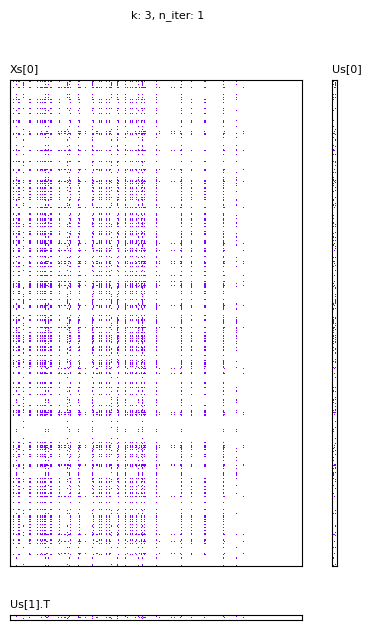

 80%|████████  | 4/5 [02:36<00:34, 34.48s/it]

[I] k: 4, n_iter: 0


[I]     [ f0: 1 ]====[ m: 0 ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:02<00:00, 141.09it/s]


[I]     harmonic: 1069.00 ---> 1141.00
[I]     weighted: 1069.00 ---> 1141.00
[I]     best_idx: 17


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 30474.79it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
15,29/02/24 12:07:27,2,4,971.500000,0.414825,0.731508,0.631284,0.529424
16,29/02/24 12:07:33,2,5,973.000000,0.416747,0.732620,0.632325,0.531279
17,29/02/24 12:07:42,2,6,973.750000,0.412264,0.736345,0.632325,0.528585
18,29/02/24 12:07:55,3,0,1069.000000,0.447326,0.745067,0.647134,0.559024
19,29/02/24 12:08:08,4,0,1141.000000,0.480467,0.747633,0.659142,0.584990


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1115.60it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
15,29/02/24 12:07:28,2,4,0.328108,0.679814,0.586786,0.442598
16,29/02/24 12:07:34,2,5,0.329227,0.680556,0.587346,0.443774
17,29/02/24 12:07:43,2,6,0.326988,0.685446,0.588466,0.442760
18,29/02/24 12:07:55,3,0,0.346025,0.689732,0.595185,0.460850
19,29/02/24 12:08:09,4,0,0.367301,0.693446,0.602464,0.480234


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
15,29/02/24 12:07:29,2,971.500000,0.414825,0.731508,0.631284,0.529424,971.500000,0.414825,0.731508,0.631284,0.529424
16,29/02/24 12:07:35,2,973.000000,0.416747,0.732620,0.632325,0.531279,973.000000,0.416747,0.732620,0.632325,0.531279
17,29/02/24 12:07:44,2,973.750000,0.412264,0.736345,0.632325,0.528585,973.750000,0.412264,0.736345,0.632325,0.528585
18,29/02/24 12:07:57,3,1069.000000,0.447326,0.745067,0.647134,0.559024,1069.000000,0.447326,0.745067,0.647134,0.559024
19,29/02/24 12:08:10,4,1141.000000,0.480467,0.747633,0.659142,0.584990,1141.000000,0.480467,0.747633,0.659142,0.584990


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
15,29/02/24 12:07:29,2,0.328108,0.679814,0.586786,0.442598,0.328108,0.679814,0.586786,0.442598
16,29/02/24 12:07:35,2,0.329227,0.680556,0.587346,0.443774,0.329227,0.680556,0.587346,0.443774
17,29/02/24 12:07:44,2,0.326988,0.685446,0.588466,0.442760,0.326988,0.685446,0.588466,0.442760
18,29/02/24 12:07:57,3,0.346025,0.689732,0.595185,0.460850,0.346025,0.689732,0.595185,0.460850
19,29/02/24 12:08:10,4,0.367301,0.693446,0.602464,0.480234,0.367301,0.693446,0.602464,0.480234


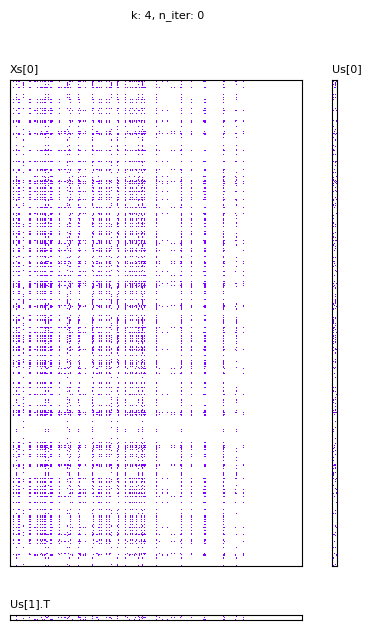

[I] k: 4, n_iter: 1


[I]     [ f0: [0] ]====[ m: [0] ]===>[ f1: 1 ]: 100%|██████████| 300/300 [00:03<00:00, 99.70it/s] 


[I]     break_counter: 0


[I]     [ f0: [1] ]====[ m: [0] ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:02<00:00, 112.05it/s]


[I]     harmonic: 1141.00 ---> 1141.50
[I]     weighted: 1141.00 ---> 1141.50
[I]     best_idx: 93


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 36692.50it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
16,29/02/24 12:07:33,2,5,973.000000,0.416747,0.732620,0.632325,0.531279
17,29/02/24 12:07:42,2,6,973.750000,0.412264,0.736345,0.632325,0.528585
18,29/02/24 12:07:55,3,0,1069.000000,0.447326,0.745067,0.647134,0.559024
19,29/02/24 12:08:08,4,0,1141.000000,0.480467,0.747633,0.659142,0.584990
20,29/02/24 12:08:17,4,1,1141.500000,0.482069,0.748260,0.659942,0.586368


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1261.01it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
16,29/02/24 12:07:34,2,5,0.329227,0.680556,0.587346,0.443774
17,29/02/24 12:07:43,2,6,0.326988,0.685446,0.588466,0.442760
18,29/02/24 12:07:55,3,0,0.346025,0.689732,0.595185,0.460850
19,29/02/24 12:08:09,4,0,0.367301,0.693446,0.602464,0.480234
20,29/02/24 12:08:17,4,1,0.370661,0.692469,0.603024,0.482859


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
16,29/02/24 12:07:35,2,973.000000,0.416747,0.732620,0.632325,0.531279,973.000000,0.416747,0.732620,0.632325,0.531279
17,29/02/24 12:07:44,2,973.750000,0.412264,0.736345,0.632325,0.528585,973.750000,0.412264,0.736345,0.632325,0.528585
18,29/02/24 12:07:57,3,1069.000000,0.447326,0.745067,0.647134,0.559024,1069.000000,0.447326,0.745067,0.647134,0.559024
19,29/02/24 12:08:10,4,1141.000000,0.480467,0.747633,0.659142,0.584990,1141.000000,0.480467,0.747633,0.659142,0.584990
20,29/02/24 12:08:18,4,1141.500000,0.482069,0.748260,0.659942,0.586368,1141.500000,0.482069,0.748260,0.659942,0.586368


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
16,29/02/24 12:07:35,2,0.329227,0.680556,0.587346,0.443774,0.329227,0.680556,0.587346,0.443774
17,29/02/24 12:07:44,2,0.326988,0.685446,0.588466,0.442760,0.326988,0.685446,0.588466,0.442760
18,29/02/24 12:07:57,3,0.346025,0.689732,0.595185,0.460850,0.346025,0.689732,0.595185,0.460850
19,29/02/24 12:08:10,4,0.367301,0.693446,0.602464,0.480234,0.367301,0.693446,0.602464,0.480234
20,29/02/24 12:08:18,4,0.370661,0.692469,0.603024,0.482859,0.370661,0.692469,0.603024,0.482859


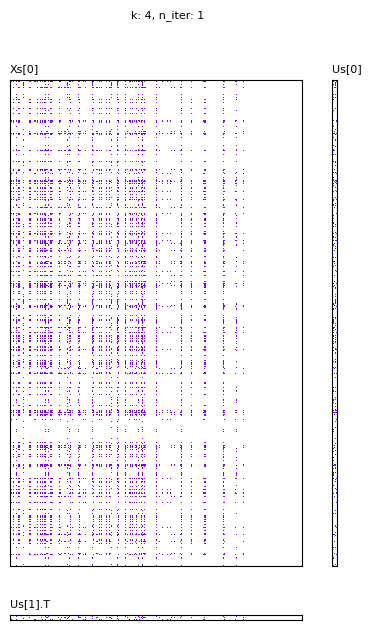

[I] k: 4, n_iter: 2


[I]     [ f0: [0] ]====[ m: [0] ]===>[ f1: 1 ]: 100%|██████████| 300/300 [00:03<00:00, 96.08it/s] 


[I]     harmonic: 1141.50 ---> 1142.00
[I]     weighted: 1141.50 ---> 1142.00
[I]     best_idx: 93


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 19436.84it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
17,29/02/24 12:07:42,2,6,973.750000,0.412264,0.736345,0.632325,0.528585
18,29/02/24 12:07:55,3,0,1069.000000,0.447326,0.745067,0.647134,0.559024
19,29/02/24 12:08:08,4,0,1141.000000,0.480467,0.747633,0.659142,0.584990
20,29/02/24 12:08:17,4,1,1141.500000,0.482069,0.748260,0.659942,0.586368
21,29/02/24 12:08:22,4,2,1142.000000,0.482389,0.748014,0.659942,0.586529


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1342.77it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
17,29/02/24 12:07:43,2,6,0.326988,0.685446,0.588466,0.442760
18,29/02/24 12:07:55,3,0,0.346025,0.689732,0.595185,0.460850
19,29/02/24 12:08:09,4,0,0.367301,0.693446,0.602464,0.480234
20,29/02/24 12:08:17,4,1,0.370661,0.692469,0.603024,0.482859
21,29/02/24 12:08:23,4,2,0.371781,0.693111,0.603583,0.483965


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
17,29/02/24 12:07:44,2,973.750000,0.412264,0.736345,0.632325,0.528585,973.750000,0.412264,0.736345,0.632325,0.528585
18,29/02/24 12:07:57,3,1069.000000,0.447326,0.745067,0.647134,0.559024,1069.000000,0.447326,0.745067,0.647134,0.559024
19,29/02/24 12:08:10,4,1141.000000,0.480467,0.747633,0.659142,0.584990,1141.000000,0.480467,0.747633,0.659142,0.584990
20,29/02/24 12:08:18,4,1141.500000,0.482069,0.748260,0.659942,0.586368,1141.500000,0.482069,0.748260,0.659942,0.586368
21,29/02/24 12:08:24,4,1142.000000,0.482389,0.748014,0.659942,0.586529,1142.000000,0.482389,0.748014,0.659942,0.586529


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
17,29/02/24 12:07:44,2,0.326988,0.685446,0.588466,0.442760,0.326988,0.685446,0.588466,0.442760
18,29/02/24 12:07:57,3,0.346025,0.689732,0.595185,0.460850,0.346025,0.689732,0.595185,0.460850
19,29/02/24 12:08:10,4,0.367301,0.693446,0.602464,0.480234,0.367301,0.693446,0.602464,0.480234
20,29/02/24 12:08:18,4,0.370661,0.692469,0.603024,0.482859,0.370661,0.692469,0.603024,0.482859
21,29/02/24 12:08:24,4,0.371781,0.693111,0.603583,0.483965,0.371781,0.693111,0.603583,0.483965


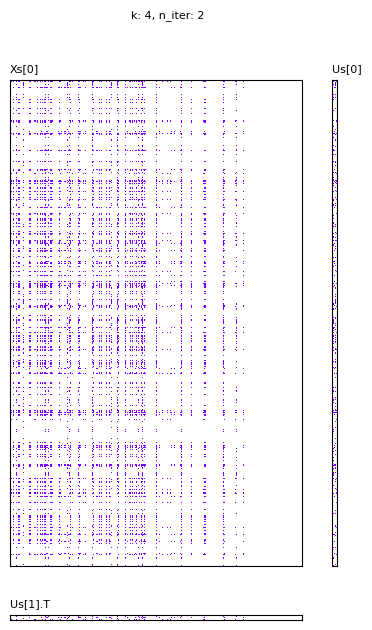

[I]     [ f0: [1] ]====[ m: [0] ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:03<00:00, 99.42it/s] 


[I]     harmonic: 1142.00 ---> 1142.50
[I]     weighted: 1142.00 ---> 1142.50
[I]     best_idx: 44


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 34532.37it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
18,29/02/24 12:07:55,3,0,1069.000000,0.447326,0.745067,0.647134,0.559024
19,29/02/24 12:08:08,4,0,1141.000000,0.480467,0.747633,0.659142,0.584990
20,29/02/24 12:08:17,4,1,1141.500000,0.482069,0.748260,0.659942,0.586368
21,29/02/24 12:08:22,4,2,1142.000000,0.482389,0.748014,0.659942,0.586529
22,29/02/24 12:08:27,4,3,1142.500000,0.481588,0.749377,0.660263,0.586355


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1202.59it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
18,29/02/24 12:07:55,3,0,0.346025,0.689732,0.595185,0.460850
19,29/02/24 12:08:09,4,0,0.367301,0.693446,0.602464,0.480234
20,29/02/24 12:08:17,4,1,0.370661,0.692469,0.603024,0.482859
21,29/02/24 12:08:23,4,2,0.371781,0.693111,0.603583,0.483965
22,29/02/24 12:08:28,4,3,0.368421,0.695560,0.603583,0.481698


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
18,29/02/24 12:07:57,3,1069.000000,0.447326,0.745067,0.647134,0.559024,1069.000000,0.447326,0.745067,0.647134,0.559024
19,29/02/24 12:08:10,4,1141.000000,0.480467,0.747633,0.659142,0.584990,1141.000000,0.480467,0.747633,0.659142,0.584990
20,29/02/24 12:08:18,4,1141.500000,0.482069,0.748260,0.659942,0.586368,1141.500000,0.482069,0.748260,0.659942,0.586368
21,29/02/24 12:08:24,4,1142.000000,0.482389,0.748014,0.659942,0.586529,1142.000000,0.482389,0.748014,0.659942,0.586529
22,29/02/24 12:08:29,4,1142.500000,0.481588,0.749377,0.660263,0.586355,1142.500000,0.481588,0.749377,0.660263,0.586355


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
18,29/02/24 12:07:57,3,0.346025,0.689732,0.595185,0.460850,0.346025,0.689732,0.595185,0.460850
19,29/02/24 12:08:10,4,0.367301,0.693446,0.602464,0.480234,0.367301,0.693446,0.602464,0.480234
20,29/02/24 12:08:18,4,0.370661,0.692469,0.603024,0.482859,0.370661,0.692469,0.603024,0.482859
21,29/02/24 12:08:24,4,0.371781,0.693111,0.603583,0.483965,0.371781,0.693111,0.603583,0.483965
22,29/02/24 12:08:29,4,0.368421,0.695560,0.603583,0.481698,0.368421,0.695560,0.603583,0.481698


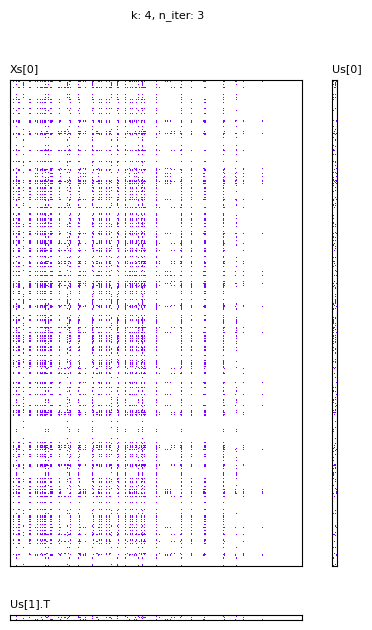

[I] k: 4, n_iter: 4


[I]     [ f0: [0] ]====[ m: [0] ]===>[ f1: 1 ]: 100%|██████████| 300/300 [00:02<00:00, 103.39it/s]


[I]     harmonic: 1142.50 ---> 1143.00
[I]     weighted: 1142.50 ---> 1143.00
[I]     best_idx: 44


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 18572.39it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
19,29/02/24 12:08:08,4,0,1141.000000,0.480467,0.747633,0.659142,0.584990
20,29/02/24 12:08:17,4,1,1141.500000,0.482069,0.748260,0.659942,0.586368
21,29/02/24 12:08:22,4,2,1142.000000,0.482389,0.748014,0.659942,0.586529
22,29/02/24 12:08:27,4,3,1142.500000,0.481588,0.749377,0.660263,0.586355
23,29/02/24 12:08:33,4,4,1143.000000,0.481908,0.749315,0.660343,0.586573


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1164.53it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
19,29/02/24 12:08:09,4,0,0.367301,0.693446,0.602464,0.480234
20,29/02/24 12:08:17,4,1,0.370661,0.692469,0.603024,0.482859
21,29/02/24 12:08:23,4,2,0.371781,0.693111,0.603583,0.483965
22,29/02/24 12:08:28,4,3,0.368421,0.695560,0.603583,0.481698
23,29/02/24 12:08:33,4,4,0.368421,0.695560,0.603583,0.481698


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
19,29/02/24 12:08:10,4,1141.000000,0.480467,0.747633,0.659142,0.584990,1141.000000,0.480467,0.747633,0.659142,0.584990
20,29/02/24 12:08:18,4,1141.500000,0.482069,0.748260,0.659942,0.586368,1141.500000,0.482069,0.748260,0.659942,0.586368
21,29/02/24 12:08:24,4,1142.000000,0.482389,0.748014,0.659942,0.586529,1142.000000,0.482389,0.748014,0.659942,0.586529
22,29/02/24 12:08:29,4,1142.500000,0.481588,0.749377,0.660263,0.586355,1142.500000,0.481588,0.749377,0.660263,0.586355
23,29/02/24 12:08:35,4,1143.000000,0.481908,0.749315,0.660343,0.586573,1143.000000,0.481908,0.749315,0.660343,0.586573


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
19,29/02/24 12:08:10,4,0.367301,0.693446,0.602464,0.480234,0.367301,0.693446,0.602464,0.480234
20,29/02/24 12:08:18,4,0.370661,0.692469,0.603024,0.482859,0.370661,0.692469,0.603024,0.482859
21,29/02/24 12:08:24,4,0.371781,0.693111,0.603583,0.483965,0.371781,0.693111,0.603583,0.483965
22,29/02/24 12:08:29,4,0.368421,0.695560,0.603583,0.481698,0.368421,0.695560,0.603583,0.481698
23,29/02/24 12:08:35,4,0.368421,0.695560,0.603583,0.481698,0.368421,0.695560,0.603583,0.481698


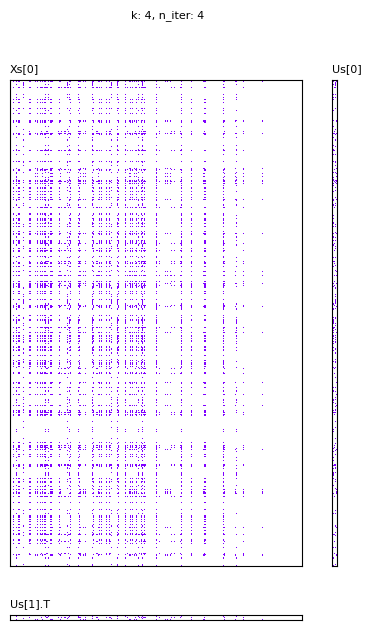

[I]     [ f0: [1] ]====[ m: [0] ]===>[ f1: 0 ]: 100%|██████████| 300/300 [00:02<00:00, 109.79it/s]


[I]     break_counter: 0
[I] k: 4, n_iter: 5


[I]     [ f0: [0] ]====[ m: [0] ]===>[ f1: 1 ]: 100%|██████████| 300/300 [00:03<00:00, 91.38it/s] 


[I]     break_counter: 1
[I] Updating pattern k: 4


[I] Making predictions: 100%|██████████| 12492/12492 [00:00<00:00, 33881.22it/s]


,time,k,iter,score,Recall,Precision,Accuracy,F1
0,29/02/24 12:06:14,0,5,684.500000,0.287864,0.728230,0.590218,0.412622
1,29/02/24 12:06:59,1,6,850.500000,0.361031,0.730010,0.613753,0.483128
2,29/02/24 12:07:50,2,7,973.750000,0.412264,0.736345,0.632325,0.528585
3,29/02/24 12:08:04,3,1,1069.000000,0.447326,0.745067,0.647134,0.559024
4,29/02/24 12:08:41,4,5,1143.000000,0.481908,0.749315,0.660343,0.586573


[I] Making predictions: 100%|██████████| 1786/1786 [00:01<00:00, 1047.50it/s]


,time,k,iter,Recall,Precision,Accuracy,F1
0,29/02/24 12:06:15,0,5,0.246361,0.676923,0.564390,0.361248
1,29/02/24 12:06:59,1,6,0.291153,0.673575,0.575028,0.406568
2,29/02/24 12:07:51,2,7,0.326988,0.685446,0.588466,0.442760
3,29/02/24 12:08:04,3,1,0.346025,0.689732,0.595185,0.460850
4,29/02/24 12:08:42,4,5,0.368421,0.695560,0.603583,0.481698


,time,k,w-score,w-Recall,w-Precision,w-Accuracy,w-F1,h-score,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:06:16,0,684.500000,0.287864,0.728230,0.590218,0.412622,684.500000,0.287864,0.728230,0.590218,0.412622
1,29/02/24 12:07:01,1,850.500000,0.361031,0.730010,0.613753,0.483128,850.500000,0.361031,0.730010,0.613753,0.483128
2,29/02/24 12:07:52,2,973.750000,0.412264,0.736345,0.632325,0.528585,973.750000,0.412264,0.736345,0.632325,0.528585
3,29/02/24 12:08:06,3,1069.000000,0.447326,0.745067,0.647134,0.559024,1069.000000,0.447326,0.745067,0.647134,0.559024
4,29/02/24 12:08:43,4,1143.000000,0.481908,0.749315,0.660343,0.586573,1143.000000,0.481908,0.749315,0.660343,0.586573


,time,k,w-Recall,w-Precision,w-Accuracy,w-F1,h-Recall,h-Precision,h-Accuracy,h-F1
0,29/02/24 12:06:16,0,0.246361,0.676923,0.564390,0.361248,0.246361,0.676923,0.564390,0.361248
1,29/02/24 12:07:01,1,0.291153,0.673575,0.575028,0.406568,0.291153,0.673575,0.575028,0.406568
2,29/02/24 12:07:52,2,0.326988,0.685446,0.588466,0.442760,0.326988,0.685446,0.588466,0.442760
3,29/02/24 12:08:06,3,0.346025,0.689732,0.595185,0.460850,0.346025,0.689732,0.595185,0.460850
4,29/02/24 12:08:43,4,0.368421,0.695560,0.603583,0.481698,0.368421,0.695560,0.603583,0.481698


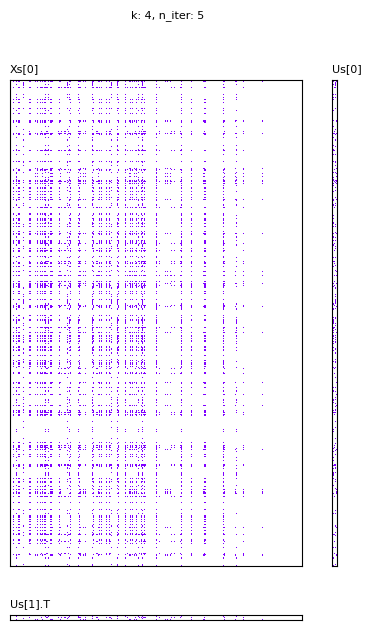

100%|██████████| 5/5 [03:14<00:00, 38.81s/it]


In [8]:
assoc = AssoExCollective(k=k, tau=tau, w=[w], p=[1], n_basis=None)
assoc.fit(
    Xs_train=[X_train], 
    factors=[[0, 1]], 
    Xs_val=[X_val], 
    task='prediction', 
    verbose=True, 
    display=True)